# Research of apartment sale listings

You have access to an archive of apartment sale listings in St. Petersburg and neighboring areas for several years (Russia). It is necessary to determine what influences the market value of apartments.

For each apartment for sale, two types of data are available. The first is entered by the user, and the second is obtained automatically based on cartographic data. For example, distances to the city center, airport, and other objects — this data is automatically received from geoservices. The number of parks and water bodies is also filled in without user involvement.

To achieve the goal of the project, the following steps will be taken:
1. Cleaning the data from outliers
2. Filling in missing values
3. Grouping the data
4. Searching for dependencies in the data
5. Drawing conclusions

### Exploring general information about the data

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 22)
data = pd.read_csv('real_estate_data.csv', sep='\t')
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info() #reviewing general data about the table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Description of the data:

1. airports_nearest — the distance to the nearest airport in meters (m)
2. balcony — the number of balconies
3. ceiling_height — ceiling height in meters (m)
4. cityCenters_nearest — the distance to the city center in meters (m)
5. days_exposition — how many days the ad was published (from publication to removal)
6. first_day_exposition — the publication date
7. floor — floor
8. floors_total — total number of floors in the building
9. is_apartment — apartment (boolean type)
10. kitchen_area — kitchen area in square meters (m²)
11. last_price — the price at the time of removal from publication
12. living_area — living area in square meters (m²)
13. locality_name — the name of the locality
14. open_plan — open floor plan (boolean type)
15. parks_around3000 — the number of parks within a 3 km radius
16. parks_nearest — the distance to the nearest park in meters (m)
17. ponds_around3000 — the number of ponds within a 3 km radius
18. ponds_nearest — the distance to the nearest pond in meters (m)
19. rooms — the number of rooms
20. studio — studio apartment (boolean type)
21. total_area — the total area of the apartment in square meters (m²)
22. total_images — the number of photos of the apartment in the ad


**Next, let's build a histogram based on the data in the table. This will help draw attention to the distribution of data and indicate the initial signs of "errors" in the data.**

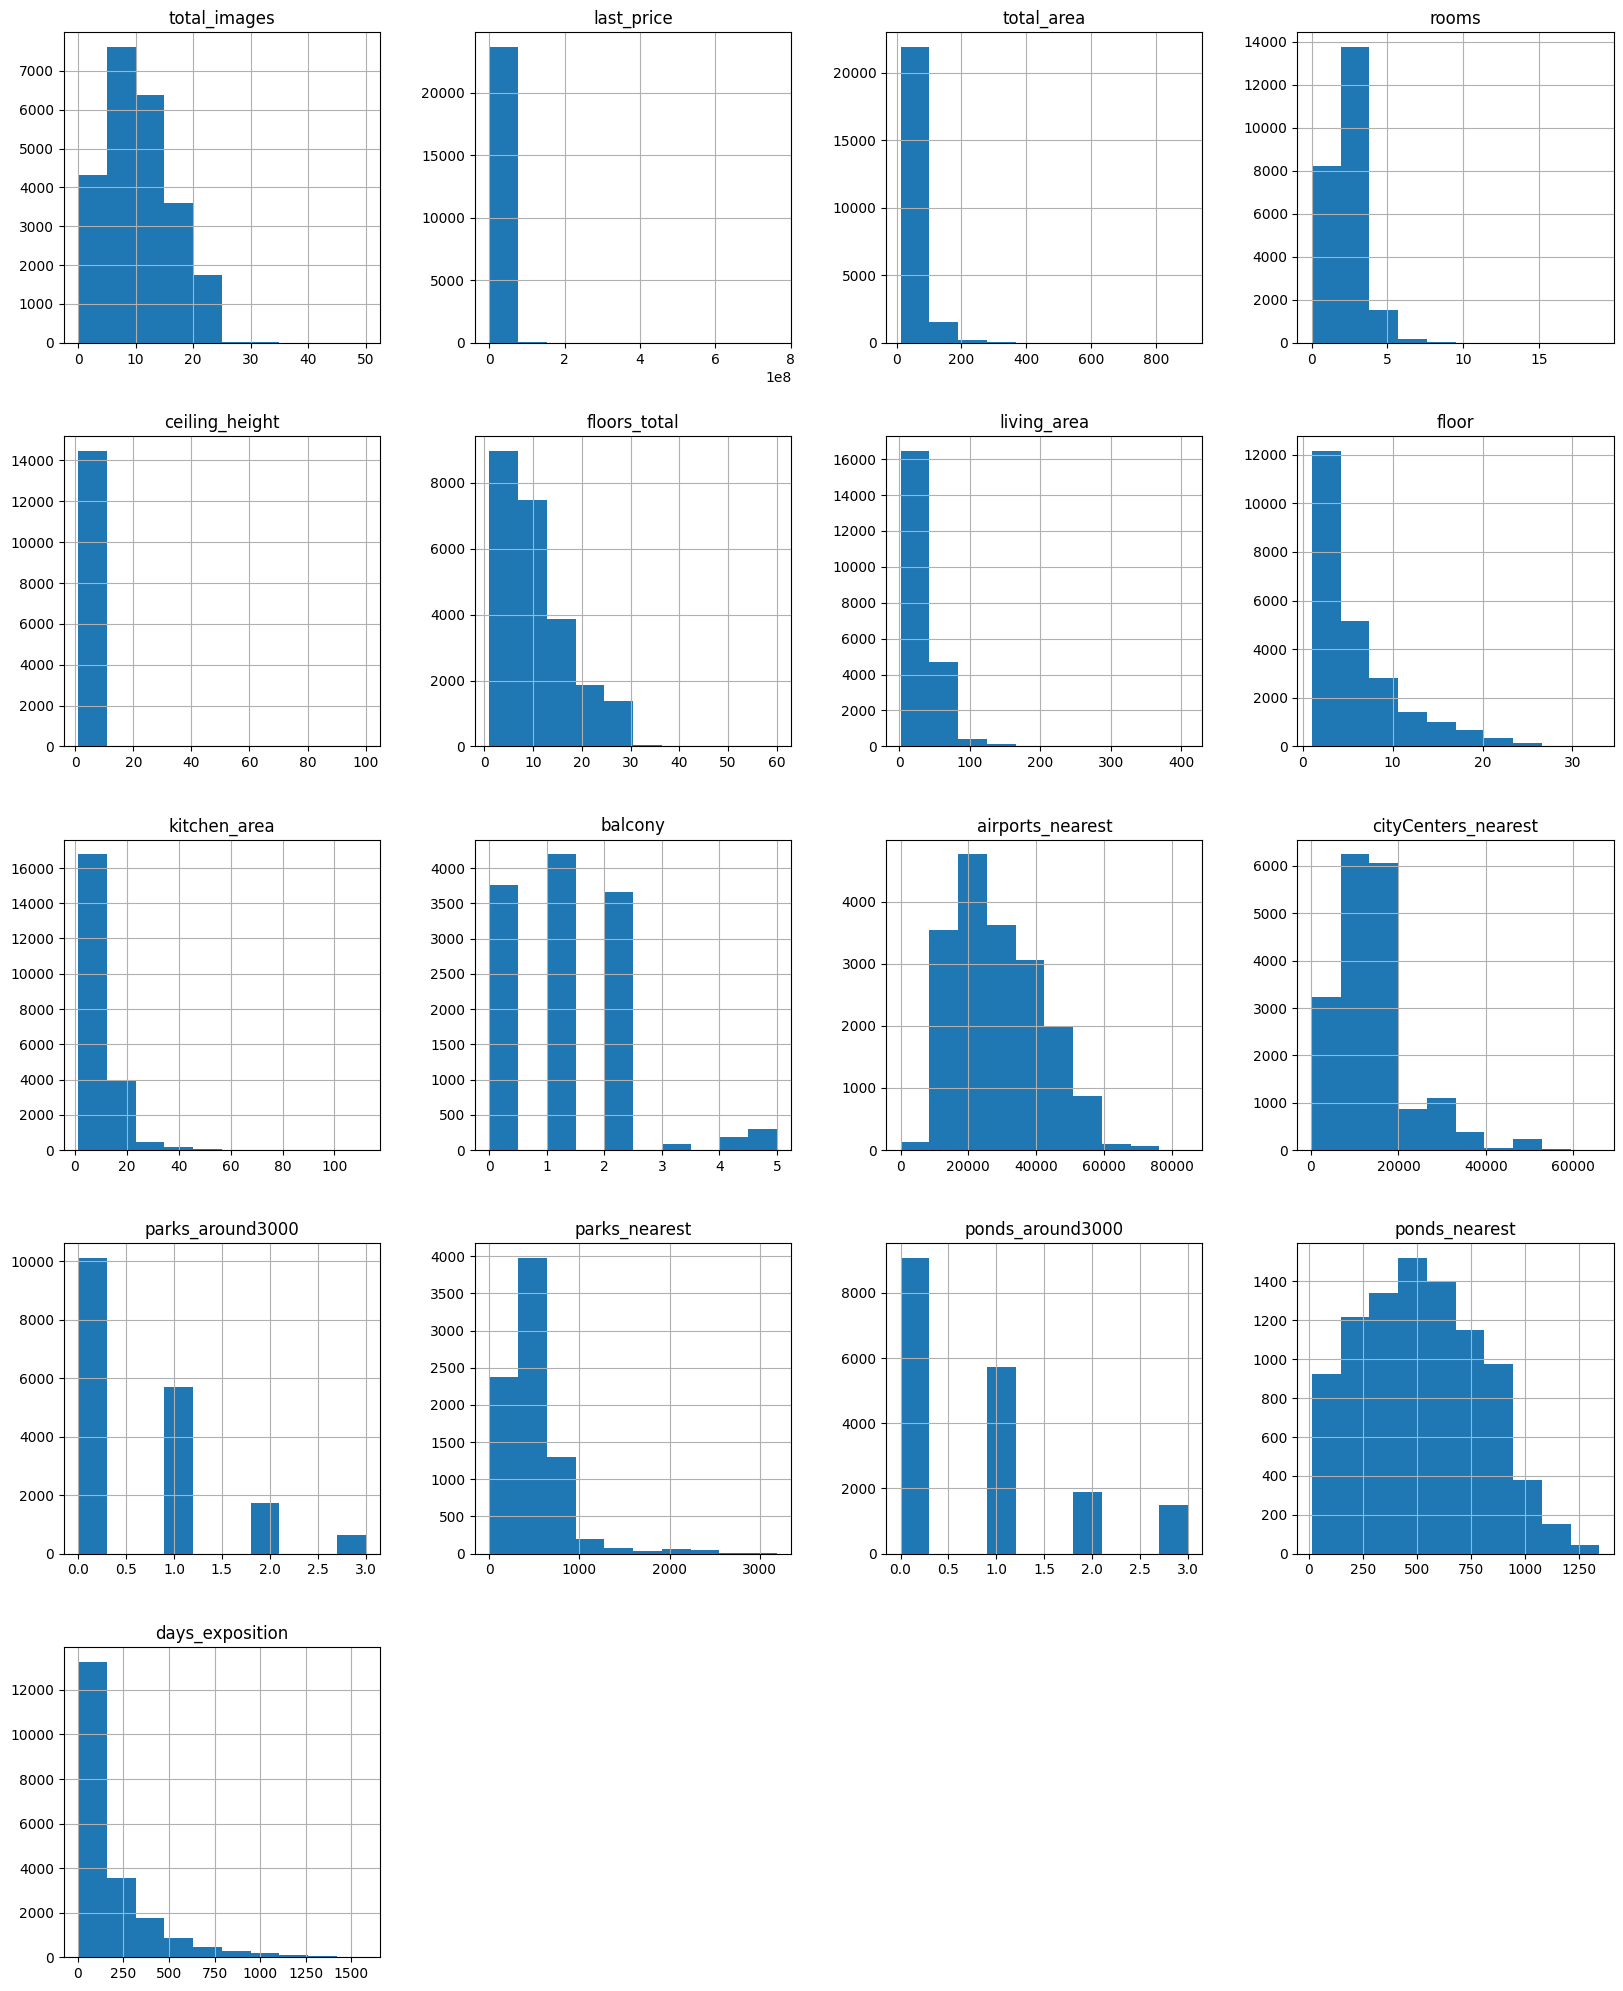

In [4]:
data.hist(figsize=(20, 25));

Based on the graphs, it is worth taking a closer look at:

1. The last price – the values and their distribution on the graph are unclear.
2. The total area – there might be outliers that should be removed (the tails will affect the number of rooms, living area, and kitchen area).
3. There are outliers in the days an ad is active.

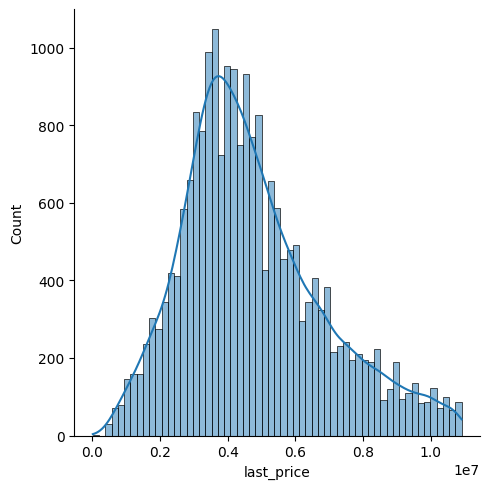

In [5]:
import seaborn as sns #Let's look at the distribution of prices by removing the right tail.
quantile_90 = data[data["last_price"] < data['last_price'].quantile(0.90)]
sns.displot(quantile_90['last_price'], kde=True);

We kept 90% of all values and obtained a distribution that is close to normal. Initially, I see that prices above 100,000,000 can be removed.

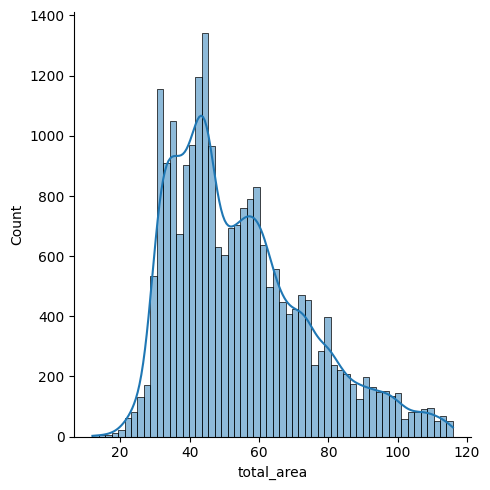

In [6]:
quantile_95_area = data[data['total_area'] < data['total_area'].quantile(0.95)] #Let's take a closer look at the distribution of total area
sns.displot(quantile_95_area['total_area'], kde=True);

Removing the top 5% of values improves the graph. It's noticeable that there are flats smaller than 20 sq.m, and there are few of them. I think it's also worth removing them.

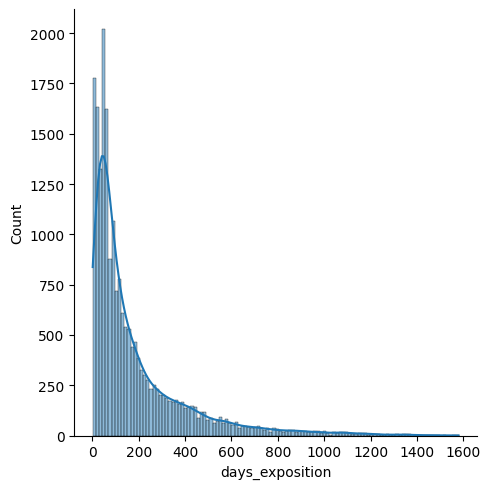

In [7]:
sns.displot(data['days_exposition'], kde=True);#Let's take a closer look at the distribution of the days exposition

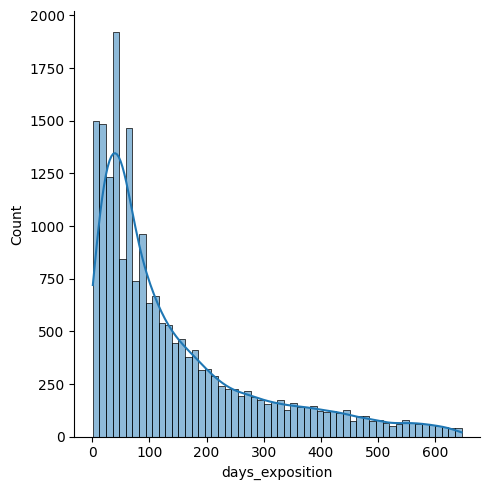

In [8]:
quantile_95_day = data[data['days_exposition'] < data['days_exposition'].quantile(0.95)] 
sns.displot(quantile_95_day['days_exposition'], kde=True);

Removing the top 5% of data reduces the right tail

### Data preprocessing

**Let's look at the rows with apartment prices above 100,000,000 rub.**

In [9]:
(data.query('last_price >= 100000000')).count()

total_images            37
last_price              37
total_area              37
first_day_exposition    37
rooms                   37
ceiling_height          25
floors_total            37
living_area             32
floor                   37
is_apartment             4
studio                  37
open_plan               37
kitchen_area            31
balcony                 20
locality_name           37
airports_nearest        36
cityCenters_nearest     36
parks_around3000        36
parks_nearest           26
ponds_around3000        36
ponds_nearest           33
days_exposition         32
dtype: int64

37 rows, a small amount of data that can be disregarded.

In [10]:
a = (data.query('last_price >= 100000000'))['last_price'].count() #The variable 'a' was introduced for future use, to eventually calculate the number of deleted rows.

In [11]:
a

37

In [12]:
data_flat = data.loc[data['last_price']<100000000] #We are removing apartments with a price higher than 100,000,000 from the main dataframe.

In [13]:
(data_flat.query('last_price >100000000')).count() #Checking if there are still apartments priced higher than 100,000,000.

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

In [14]:
data_flat.info() #Checking to make sure we haven't dropped too many values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23662 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23662 non-null  int64  
 1   last_price            23662 non-null  float64
 2   total_area            23662 non-null  float64
 3   first_day_exposition  23662 non-null  object 
 4   rooms                 23662 non-null  int64  
 5   ceiling_height        14479 non-null  float64
 6   floors_total          23576 non-null  float64
 7   living_area           21764 non-null  float64
 8   floor                 23662 non-null  int64  
 9   is_apartment          2771 non-null   object 
 10  studio                23662 non-null  bool   
 11  open_plan             23662 non-null  bool   
 12  kitchen_area          21390 non-null  float64
 13  balcony               12160 non-null  float64
 14  locality_name         23613 non-null  object 
 15  airports_nearest   

**Let's see how many apartments we have with a total area greater than 115 sq.m. and less than 20 sq.m.** 

In [15]:
(data_flat.query('total_area >115'))['total_area'].count()

1180

In [16]:
(data_flat.query('total_area <20'))['total_area'].count()

27

In [17]:
a = a + (data_flat.query('total_area <20'))['total_area'].count() #Counting the number of rows to delete for apartments less than 20 sq.m.

In [18]:
a

64

In [19]:
data_flat_for_displot = data_flat.query('20<total_area<120')

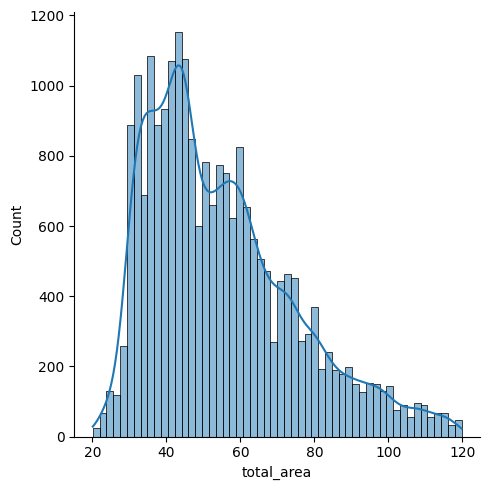

In [20]:
sns.displot(data_flat_for_displot['total_area'], kde=True);

In [21]:
(data_flat.query('total_area >140'))['total_area'].count()

659

In [22]:
data_flat_for_displot = data_flat.query('20<total_area<140')

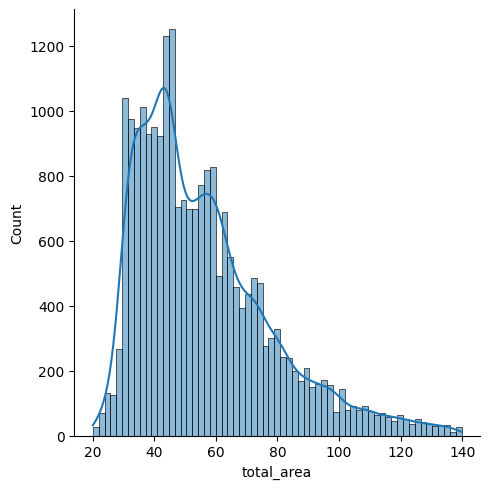

In [23]:
sns.displot(data_flat_for_displot['total_area'], kde=True);

It seems that removing 1180 values at once is too much. Let's keep the apartments that are larger than 20 sq.m. and smaller than 140 sq.m.

In [24]:
a = a + (data_flat.query('total_area >140'))['total_area'].count() #Calculating the number of deleted rows.

In [25]:
a

723

In [26]:
data_flat = data_flat.query('20<=total_area<=140')

In [27]:
data_flat.query('total_area<20')['total_area'].count() #Checking to make sure we removed the values.

0

In [28]:
data_flat.query('total_area>140')['total_area'].count() #Checking to make sure we removed the values.

0

In [29]:
data_flat.info() #Checking to make sure we didn't remove too many values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22976 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22976 non-null  int64  
 1   last_price            22976 non-null  float64
 2   total_area            22976 non-null  float64
 3   first_day_exposition  22976 non-null  object 
 4   rooms                 22976 non-null  int64  
 5   ceiling_height        14007 non-null  float64
 6   floors_total          22892 non-null  float64
 7   living_area           21162 non-null  float64
 8   floor                 22976 non-null  int64  
 9   is_apartment          2690 non-null   object 
 10  studio                22976 non-null  bool   
 11  open_plan             22976 non-null  bool   
 12  kitchen_area          20795 non-null  float64
 13  balcony               11869 non-null  float64
 14  locality_name         22929 non-null  object 
 15  airports_nearest   

**Let's see how many apartments were listed for more than 700 days in the ads.**

In [30]:
(data_flat.query('days_exposition >=700'))['days_exposition'].count()

803

I think we can ignore the apartments that were listed for sale for more than 700 days.

In [31]:
a = a + (data_flat.query('days_exposition >=700'))['days_exposition'].count() #Counting the number of deleted rows

In [32]:
a

1526

In [33]:
data_flat = data_flat.query('not days_exposition >= 700') #Using this construction to keep NaN values.

In [34]:
(data_flat.query('days_exposition > 700'))['days_exposition'].count() #Checking if there are still values greater than 700 in the dataframe.

0

In [35]:
data_flat.info() #Checking if we removed too many values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22173 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22173 non-null  int64  
 1   last_price            22173 non-null  float64
 2   total_area            22173 non-null  float64
 3   first_day_exposition  22173 non-null  object 
 4   rooms                 22173 non-null  int64  
 5   ceiling_height        13485 non-null  float64
 6   floors_total          22093 non-null  float64
 7   living_area           20406 non-null  float64
 8   floor                 22173 non-null  int64  
 9   is_apartment          2567 non-null   object 
 10  studio                22173 non-null  bool   
 11  open_plan             22173 non-null  bool   
 12  kitchen_area          20041 non-null  float64
 13  balcony               11505 non-null  float64
 14  locality_name         22127 non-null  object 
 15  airports_nearest   

**Now let's calculate the percentage of data we removed. We aim not to exceed 10%.**

In [36]:
a*100/23699

6.439090256972868

So far, we are staying below 10%.

**Now let's move on to handling NaN values.**

<font color="red">**6. Ceiling height (ceiling_height)** - in almost half of the cases, the data is missing. Users filled it, and most likely the field was optional, or there are issues with the data extraction.</font>

We see that the ceiling height is filled in 14,504 cases out of 23,699 (in the original dataframe). Let's try to see what ceiling heights are common.

In [37]:
data_flat['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   2.65,   3.  ,   2.61,   3.2 ,
         3.25,   3.45,   2.64,   2.57,   4.15,   4.  ,   2.47,   2.73,
         2.84,   2.77,   2.34,   3.4 ,   3.5 ,   3.06,   2.72,   2.54,
         2.51,   2.78,   2.76,   3.1 ,  25.  ,   2.58,   3.7 ,   2.52,
         2.87,   2.66,   2.59,   2.  ,   2.85,   3.3 ,   2.45,   3.6 ,
         2.92,   3.13,   3.8 ,   3.15,   3.55,   3.62,   3.12,   2.53,
         2.96,   2.46,   2.74,   5.  ,   2.79,   2.95,   4.06,   2.94,
         3.54,   3.53,   2.83,   2.4 ,   3.38,   3.01,   3.65,   3.18,
         2.71,   2.3 ,   2.48,   2.62,   3.98,   2.63,   3.83,   3.52,
         3.75,   2.88,   3.66,   4.19,   3.95,   3.35,   3.24,   4.8 ,
         4.5 ,   4.2 ,   3.36,  32.  ,   3.68,   3.07,   3.37,   3.09,
         8.  ,   3.16,   3.26,   3.34,   2.81,   3.44,   2.97,   4.37,
         2.68,   3.9 ,   3.27,   2.82,  27.  ,   4.1 ,   2.93,   3.46,
      

We see that there are missing values that can be filled with median values, and there are unrealistically large values that also need to be addressed.

In [38]:
print("The maximum ceiling height", data_flat['ceiling_height'].max(), "The minimum ceiling height",data_flat['ceiling_height'].min())

The maximum ceiling height 100.0 The minimum ceiling height 1.0


According to data from the internet, the minimum ceiling height is 2.4, and based on my knowledge, the ceiling height in apartments is not higher than 7. Let's see how many values fall outside the range from 2.4 to 7.

In [39]:
data_flat.query('ceiling_height>7')['ceiling_height'].count() #Counting the number of apartments with ceiling heights above 7 meters.

29

In [40]:
data_flat.query('ceiling_height<2.4')['ceiling_height'].count() #Counting the number of apartments with ceiling heights below 2.4 meters.

21

Looking at the data again, I realized that two-digit values, like 25, may have been incorrectly separated by a dot. Let's take all values greater than 24 and divide them by 10.

In [41]:
def ceiling(height):
    if height>=24:
        return height/10
    else:
        return height
    
    
data_flat['ceiling_height'] = data_flat['ceiling_height'].apply(ceiling)

In [42]:
data_flat['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  2.65,  3.  ,  2.61,  3.2 ,  3.25,  3.45,
        2.64,  2.57,  4.15,  4.  ,  2.47,  2.73,  2.84,  2.77,  2.34,
        3.4 ,  3.5 ,  3.06,  2.72,  2.54,  2.51,  2.78,  2.76,  3.1 ,
        2.58,  3.7 ,  2.52,  2.87,  2.66,  2.59,  2.  ,  2.85,  3.3 ,
        2.45,  3.6 ,  2.92,  3.13,  3.8 ,  3.15,  3.55,  3.62,  3.12,
        2.53,  2.96,  2.46,  2.74,  5.  ,  2.79,  2.95,  4.06,  2.94,
        3.54,  3.53,  2.83,  2.4 ,  3.38,  3.01,  3.65,  3.18,  2.71,
        2.3 ,  2.48,  2.62,  3.98,  2.63,  3.83,  3.52,  3.75,  2.88,
        3.66,  4.19,  3.95,  3.35,  3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,
        3.68,  3.07,  3.37,  3.09,  8.  ,  3.16,  3.26,  3.34,  2.81,
        3.44,  2.97,  4.37,  2.68,  3.9 ,  3.27,  2.82,  4.1 ,  2.93,
        3.46,  3.47,  3.33,  3.63,  3.11,  3.14,  3.32,  1.2 ,  8.3 ,
        2.98,  2.86,  3.08,  3.28,  3.67,  3.04,  3.23,  3.02,  3.21,
        3.78,  4.3 ,

Let's now calculate how many apartments with ceilings higher than 7 meters we still have.

In [43]:
data_flat.query('ceiling_height>7')['ceiling_height'].count()

9

Now let's add the number of rows to be deleted to the variable 'a'.

In [44]:
a = a + data_flat.query('ceiling_height>7')['ceiling_height'].count() + data_flat.query('ceiling_height<2.4')['ceiling_height'].count()

In [45]:
a

1556

Now let's delete the apartments with "non-standard" ceiling heights.

In [46]:
data_flat = data_flat.query('not ceiling_height>7') #Keeping the apartments with ceiling heights up to 7 meters.

In [47]:
data_flat = data_flat.query('not ceiling_height<2.4') #Keeping the apartments with ceiling heights greater than 2.4 meters.

In [48]:
data_flat.query('ceiling_height>7')['ceiling_height'].count() #Checking that the values were removed.

0

In [49]:
data_flat.query('ceiling_height<2.4')['ceiling_height'].count() #Checking that the values were removed.

0

Calculating the median for ceiling heights.

In [50]:
print (data_flat['ceiling_height'].median())

2.65


In [51]:
data_flat['ceiling_height'] = data_flat['ceiling_height'].fillna(2.65)#Filling in the ceiling heights with the median value.

In [52]:
data_flat.info() #Checking if there are any remaining empty values in the 'Ceiling Height' column.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22143 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22143 non-null  int64  
 1   last_price            22143 non-null  float64
 2   total_area            22143 non-null  float64
 3   first_day_exposition  22143 non-null  object 
 4   rooms                 22143 non-null  int64  
 5   ceiling_height        22143 non-null  float64
 6   floors_total          22063 non-null  float64
 7   living_area           20379 non-null  float64
 8   floor                 22143 non-null  int64  
 9   is_apartment          2561 non-null   object 
 10  studio                22143 non-null  bool   
 11  open_plan             22143 non-null  bool   
 12  kitchen_area          20016 non-null  float64
 13  balcony               11489 non-null  float64
 14  locality_name         22097 non-null  object 
 15  airports_nearest   

<font color="orange">**7. The "Floors Total" (floors_total)** - column has a small amount of missing data, possibly because the field was optional or is considered optional, but users typically fill it out.</font>

Let's check the maximum and minimum values just in case.

In [53]:
print("The maximum number of floors", data_flat['floors_total'].max(), "The minimum number of floors",data_flat['floors_total'].min())

The maximum number of floors 60.0 The minimum number of floors 1.0


The data (maximum and minimum) looks correct. Initially, there were 23,699 values in the dataframe, and there are 23,613 values for the total number of floors (few missing values). We will leave the empty values as they are because filling them with the median value wouldn't be suitable for this case.

<font color="orange">**Living area (living_area)** - a small amount of data is missing, perhaps the field was optional up to a certain period, or it is optional, but users tend to fill it in.</font> 

<font color="orange">**13. Kitchen area (kitchen_area)** - a small amount of data is missing, perhaps the field was optional up to a certain period, or it is optional, but users tend to fill it in.</font> 

We have moved on to the rows with areas. Let's do a basic check and see if there are rows where the total area is less than the sum of living area and kitchen area. If such rows exist, we will delete them.

In [54]:
display (data_flat.loc[data_flat['total_area'] < data_flat['living_area'] + data_flat['kitchen_area']].tail (10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20034,7,1230000.0,46.00,2019-02-27T00:00:00,1,2.50,9.0,37.0,2,NaN,False,False,11.00,NaN,Ивангород,NaN,NaN,NaN,NaN,NaN,NaN,46.0
20490,4,3299000.0,41.00,2017-06-28T00:00:00,1,2.70,25.0,35.1,16,NaN,False,False,10.30,2.0,посёлок Шушары,12840.0,18626.0,0.0,NaN,0.0,NaN,163.0
21266,10,8800000.0,60.00,2018-07-23T00:00:00,2,3.15,6.0,35.0,4,NaN,False,False,35.00,NaN,Санкт-Петербург,16558.0,8089.0,1.0,531.0,2.0,518.0,NaN
21377,19,4900000.0,42.00,2017-04-18T00:00:00,1,2.75,24.0,37.7,19,False,False,False,11.00,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
21519,8,3950000.0,55.00,2018-10-28T00:00:00,2,2.60,5.0,52.5,1,False,False,False,9.00,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,58.0
21824,20,2450000.0,44.00,2019-02-12T00:00:00,2,2.70,2.0,38.0,2,False,False,False,8.60,2.0,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21868,12,2600000.0,34.30,2018-09-26T00:00:00,1,2.50,9.0,30.6,6,NaN,False,False,8.00,2.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,107.0
21915,14,11990000.0,91.40,2016-05-16T00:00:00,2,2.65,16.0,62.0,12,NaN,False,False,32.40,0.0,Санкт-Петербург,10934.0,12551.0,0.0,NaN,0.0,NaN,93.0
21956,0,5200000.0,46.00,2018-07-20T00:00:00,2,2.65,5.0,44.0,5,NaN,False,False,8.00,1.0,Санкт-Петербург,14103.0,15182.0,1.0,488.0,0.0,NaN,7.0
23202,13,4919880.0,67.92,2018-10-23T00:00:00,2,2.65,3.0,63.0,3,NaN,False,False,13.04,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,60.0


Let's delete the identified rows, and the number of these rows will be added to the variable 'a'.

In [55]:
a = a + (data_flat.loc[data_flat['total_area'] < data_flat['living_area'] + data_flat['kitchen_area']]['total_images'].count())

In [56]:
a

1619

In [57]:
data_flat= data_flat.query('not total_area<living_area+kitchen_area')

In [58]:
data_flat.info() #Let's check if we accidentally deleted something extra.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22080 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22080 non-null  int64  
 1   last_price            22080 non-null  float64
 2   total_area            22080 non-null  float64
 3   first_day_exposition  22080 non-null  object 
 4   rooms                 22080 non-null  int64  
 5   ceiling_height        22080 non-null  float64
 6   floors_total          22000 non-null  float64
 7   living_area           20316 non-null  float64
 8   floor                 22080 non-null  int64  
 9   is_apartment          2544 non-null   object 
 10  studio                22080 non-null  bool   
 11  open_plan             22080 non-null  bool   
 12  kitchen_area          19953 non-null  float64
 13  balcony               11446 non-null  float64
 14  locality_name         22034 non-null  object 
 15  airports_nearest   

Let's see how much the living area typically is as a percentage of the total area.

In [59]:
voluem_ratio = data_flat[['total_area','living_area']]. copy ()

In [60]:
voluem_ratio['share'] = voluem_ratio['living_area']/voluem_ratio['total_area']

In [61]:
print (voluem_ratio.head())

   total_area  living_area     share
0       108.0         51.0  0.472222
1        40.4         18.6  0.460396
2        56.0         34.3  0.612500
4       100.0         32.0  0.320000
5        30.4         14.4  0.473684


In [62]:
print(voluem_ratio['share'].median())#Calculating the median value of the ratio of living area to total area

0.5666666666666667


Now let's fill in the missing values for the living area.

In [63]:
data_flat['living_area'] = data_flat['living_area'].fillna(0.56*data_flat['total_area']) 
pd.options.mode.chained_assignment = None

In [64]:
data_flat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22080 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22080 non-null  int64  
 1   last_price            22080 non-null  float64
 2   total_area            22080 non-null  float64
 3   first_day_exposition  22080 non-null  object 
 4   rooms                 22080 non-null  int64  
 5   ceiling_height        22080 non-null  float64
 6   floors_total          22000 non-null  float64
 7   living_area           22080 non-null  float64
 8   floor                 22080 non-null  int64  
 9   is_apartment          2544 non-null   object 
 10  studio                22080 non-null  bool   
 11  open_plan             22080 non-null  bool   
 12  kitchen_area          19953 non-null  float64
 13  balcony               11446 non-null  float64
 14  locality_name         22034 non-null  object 
 15  airports_nearest   

Now let's perform similar actions for kitchen_area and then check again if we have apartments where the total area is less than the sum of the living area and kitchen area.

In [66]:
voluem_ratio_kitchen = data_flat[['total_area','kitchen_area']].copy()

In [67]:
voluem_ratio_kitchen['share'] = voluem_ratio_kitchen['kitchen_area']/voluem_ratio_kitchen['total_area']

In [68]:
print(voluem_ratio_kitchen['share'].median())#Now let's calculate the median value of the kitchen area to the total area ratio.

0.17391304347826086


In [69]:
data_flat['kitchen_area'] = data_flat['kitchen_area'].fillna(0.17*data_flat['total_area']) 
pd.options.mode.chained_assignment = None

In [70]:
data_flat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22080 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22080 non-null  int64  
 1   last_price            22080 non-null  float64
 2   total_area            22080 non-null  float64
 3   first_day_exposition  22080 non-null  object 
 4   rooms                 22080 non-null  int64  
 5   ceiling_height        22080 non-null  float64
 6   floors_total          22000 non-null  float64
 7   living_area           22080 non-null  float64
 8   floor                 22080 non-null  int64  
 9   is_apartment          2544 non-null   object 
 10  studio                22080 non-null  bool   
 11  open_plan             22080 non-null  bool   
 12  kitchen_area          22080 non-null  float64
 13  balcony               11446 non-null  float64
 14  locality_name         22034 non-null  object 
 15  airports_nearest   

Let's check if there are rows where the total area is less than the sum of the living area and kitchen area.

In [71]:
display (data_flat.loc[data_flat['total_area'] < data_flat['living_area'] + data_flat['kitchen_area']].tail (10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19268,10,3450000.0,43.3,2018-09-18T00:00:00,1,2.75,18.0,41.30,7,NaN,False,False,7.361,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,44.0
19372,6,7500000.0,62.2,2014-12-18T00:00:00,5,3.02,6.0,55.10,1,NaN,False,False,10.574,0.0,Санкт-Петербург,24920.0,3249.0,2.0,84.0,1.0,533.0,694.0
19382,9,20786000.0,109.0,2018-07-16T00:00:00,2,3.00,7.0,61.04,4,NaN,False,False,53.000,NaN,Санкт-Петербург,24283.0,4850.0,2.0,335.0,0.0,NaN,5.0
20256,5,13351000.0,102.7,2018-07-03T00:00:00,6,3.40,4.0,101.00,1,NaN,False,False,17.459,NaN,Санкт-Петербург,24477.0,5464.0,2.0,519.0,0.0,NaN,229.0
21016,4,3700000.0,40.0,2016-03-19T00:00:00,2,2.65,16.0,22.40,13,NaN,False,False,18.000,0.0,Санкт-Петербург,8255.0,11911.0,2.0,40.0,1.0,345.0,96.0
21213,17,2980000.0,27.6,2018-11-01T00:00:00,0,2.65,17.0,23.60,2,NaN,True,False,4.692,NaN,Санкт-Петербург,15493.0,14289.0,0.0,NaN,0.0,NaN,21.0
21227,0,8200000.0,71.0,2017-07-21T00:00:00,0,5.80,5.0,68.00,5,NaN,True,False,12.070,0.0,Санкт-Петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0
22095,6,2194000.0,36.5,2017-09-27T00:00:00,1,2.65,3.0,33.20,3,NaN,False,False,6.205,0.0,Санкт-Петербург,39446.0,18500.0,0.0,NaN,2.0,639.0,36.0
22246,6,3100000.0,27.3,2018-05-29T00:00:00,0,2.70,16.0,23.30,15,NaN,True,False,4.641,1.0,Санкт-Петербург,41935.0,9551.0,0.0,NaN,0.0,NaN,59.0
23102,0,5800000.0,66.0,2017-06-09T00:00:00,5,2.65,5.0,55.50,1,NaN,False,False,11.220,0.0,Санкт-Петербург,12007.0,11933.0,0.0,NaN,0.0,NaN,21.0


Let's calculate 'a'.

In [72]:
a = a + (data_flat.loc[data_flat['total_area'] < data_flat['living_area'] + data_flat['kitchen_area']]['total_images'].count())

In [73]:
a

1662

Let's delete the incorrect values.

In [74]:
data_flat= data_flat.query('not total_area<living_area+kitchen_area')

In [75]:
data_flat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22037 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22037 non-null  int64  
 1   last_price            22037 non-null  float64
 2   total_area            22037 non-null  float64
 3   first_day_exposition  22037 non-null  object 
 4   rooms                 22037 non-null  int64  
 5   ceiling_height        22037 non-null  float64
 6   floors_total          21957 non-null  float64
 7   living_area           22037 non-null  float64
 8   floor                 22037 non-null  int64  
 9   is_apartment          2538 non-null   object 
 10  studio                22037 non-null  bool   
 11  open_plan             22037 non-null  bool   
 12  kitchen_area          22037 non-null  float64
 13  balcony               11418 non-null  float64
 14  locality_name         21991 non-null  object 
 15  airports_nearest   

Now let's calculate what percentage of data we've removed.

In [76]:
a*100/23699

7.012954133085784

Attention!! We are already close to 10%.

<font color="red">**14.Number of balconies (balcony)** - In almost half of the cases, the data is missing. Let's assume that empty values indicate the absence of a balcony.</font> 

In [602]:
data_flat['balcony'] = data_flat['balcony'].fillna(0) 

In [77]:
data_flat.info() #Checking the number of rows in the 'balcony' column.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22037 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22037 non-null  int64  
 1   last_price            22037 non-null  float64
 2   total_area            22037 non-null  float64
 3   first_day_exposition  22037 non-null  object 
 4   rooms                 22037 non-null  int64  
 5   ceiling_height        22037 non-null  float64
 6   floors_total          21957 non-null  float64
 7   living_area           22037 non-null  float64
 8   floor                 22037 non-null  int64  
 9   is_apartment          2538 non-null   object 
 10  studio                22037 non-null  bool   
 11  open_plan             22037 non-null  bool   
 12  kitchen_area          22037 non-null  float64
 13  balcony               11418 non-null  float64
 14  locality_name         21991 non-null  object 
 15  airports_nearest   

<font color="orange">**15. City/village (locality_name)** - there are very few missing values</font>


It seems like the user might not have been able to select the correct name from the dropdown list. Since there are very few such rows, I suggest simply deleting them so that they don't interfere with sorting by locality names. Additionally, I will create another copy of the main dataframe named data_flat_v2.

In [78]:
print(data_flat['locality_name'].isna().sum())

46


In [79]:
a = a + data_flat['locality_name'].isna().sum()

In [80]:
a

1708

In [81]:
data_flat_v2 = data_flat.dropna(subset=['locality_name'])

In [82]:
data_flat_v2.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21991 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21991 non-null  int64  
 1   last_price            21991 non-null  float64
 2   total_area            21991 non-null  float64
 3   first_day_exposition  21991 non-null  object 
 4   rooms                 21991 non-null  int64  
 5   ceiling_height        21991 non-null  float64
 6   floors_total          21912 non-null  float64
 7   living_area           21991 non-null  float64
 8   floor                 21991 non-null  int64  
 9   is_apartment          2523 non-null   object 
 10  studio                21991 non-null  bool   
 11  open_plan             21991 non-null  bool   
 12  kitchen_area          21991 non-null  float64
 13  balcony               11378 non-null  float64
 14  locality_name         21991 non-null  object 
 15  airports_nearest   

**Let's work with the locality_name column and check if there are any duplicates.**

In [83]:
print (data_flat_v2['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'Сланцы' 'село Путилово' 'Ивангород'
 'Мурино' 'Шлиссельбург' 'Никольское' 'Зеленогорск' 'Сосновый Бор'
 'поселок Новый Свет' 'деревня Оржицы' '

Clearly, there is an issue where "посЕлок" and "посЁлок" are used interchangeably. Let's standardize the usage to "поселок" throughout the column.

In [84]:
data_flat_v2['locality_name'] = (
    data_flat_v2['locality_name']
    .str.replace('ё', 'е')
)

In [85]:
print (data_flat_v2['locality_name'].unique()) #Let's check if there are any values with "Ё."

['Санкт-Петербург' 'поселок Шушары' 'городской поселок Янино-1'
 'поселок Парголово' 'поселок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'деревня Федоровское'
 'Выборг' 'Кронштадт' 'Кировск' 'деревня Новое Девяткино'
 'поселок Металлострой' 'поселок городского типа Лебяжье'
 'поселок городского типа Сиверский' 'поселок Молодцово'
 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'поселок Аннино' 'поселок городского типа Ефимовский'
 'поселок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'поселок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'Сланцы' 'село Путилово' 'Ивангород'
 'Мурино' 'Шлиссельбург' 'Никольское' 'Зеленогорск' 'Сосновый Бор'
 'поселок Новый Свет' 'деревня Оржицы' 'деревня Кальтино'

Now let's try to remove duplicates in the names.

In [86]:
data_flat_v2['locality_name'] = (
    data_flat_v2['locality_name']
    .replace(['поселок Мурино', 'деревня Кудрово', 'деревня Федоровское','село Павлово', 'поселок городского типа Павлово'], 
             ['Мурино', 'Кудрово', 'городской поселок Федоровское', 'городской поселок Павлово', 'городской поселок Павлово'])
)

If we remove them using the above method, it takes a very long time. For this reason, let's create a new column where we add the processed names (shortened), and then group them by the shortened name along with their "ancestors."

In [87]:
data_flat_v2['locality_name_short'] = (
    data_flat_v2['locality_name']
    .str.replace('^деревня', '', case = False, regex=True)
    .str.replace('^поселок станции', '', case = False, regex=True)
    .str.replace('^поселок при железнодорожной станции', '', case = False, regex=True)
    .str.replace('^садоводческое некоммерческое товарищество', '', case = False, regex=True)
    .str.replace('^поселок городского типа', '', case = False, regex=True)
    .str.replace('^городской поселок', '', case = False, regex=True)
    .str.replace('^коттеджный поселок', '', case = False, regex=True)
    .str.replace('^поселок', '', case = False, regex=True)
    .str.replace('^садовое товарищество', '', case = False, regex=True)
    .str.replace('^село', '', case = False, regex=True)
    .str.strip()
)

In [88]:
data_flat_v2.pivot_table(index = ['locality_name_short', 'locality_name'])


,,airports_nearest,balcony,ceiling_height,cityCenters_nearest,days_exposition,floor,floors_total,kitchen_area,last_price,living_area,open_plan,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,rooms,studio,total_area,total_images
locality_name_short,locality_name,,,,,,,,,,,,,,,,,,,
Агалатово,деревня Агалатово,NaN,0.000000,2.625000,NaN,223.666667,3.500000,4.500000,9.195000,3.567500e+06,27.110000,0.000000,NaN,NaN,NaN,NaN,1.750000,0.000000,49.175000,6.250000
Александровская,поселок Александровская,12781.0,0.000000,2.650000,27352.0,45.000000,2.000000,3.000000,7.000000,3.750000e+06,36.000000,0.000000,0.0,NaN,1.0,509.0,2.000000,0.000000,59.000000,10.000000
Алексеевка,поселок Алексеевка,NaN,NaN,2.650000,NaN,416.000000,1.000000,2.000000,6.200000,1.000000e+06,29.500000,0.000000,NaN,NaN,NaN,NaN,2.000000,0.000000,45.000000,8.000000
Аннино,поселок Аннино,NaN,1.333333,2.610714,NaN,167.727273,2.928571,4.857143,7.840214,3.175559e+06,29.768571,0.000000,NaN,NaN,NaN,NaN,1.928571,0.000000,49.742857,9.571429
Аро,деревня Аро,NaN,2.000000,2.650000,NaN,137.000000,1.666667,4.000000,12.500000,3.240000e+06,31.500000,0.000000,NaN,NaN,NaN,NaN,2.333333,0.000000,63.433333,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Яльгелево,деревня Яльгелево,NaN,1.000000,2.641667,NaN,33.666667,3.000000,3.500000,6.650000,2.575000e+06,29.533333,0.000000,NaN,NaN,NaN,NaN,1.833333,0.000000,46.650000,8.166667
Ям-Тесово,деревня Ям-Тесово,NaN,1.000000,2.650000,NaN,82.500000,3.000000,5.000000,8.755000,6.250000e+05,23.490000,0.000000,NaN,NaN,NaN,NaN,1.500000,0.000000,44.750000,9.000000
Янино-1,городской поселок Янино-1,NaN,1.166667,2.640615,NaN,94.836364,5.830769,10.476923,10.633415,3.433054e+06,25.412960,0.015385,NaN,NaN,NaN,NaN,1.615385,0.000000,48.933077,8.830769


I looked at all the rows where more than one locality_name was assigned to one locality_name_short, and I concluded that we made correct abbreviations of values.
Let's shorten the names in the main locality_name column and delete the locality_name_short column.

In [89]:
data_flat_v2['locality_name'] = (
    data_flat_v2['locality_name']
    .str.replace('^деревня', '', case = False, regex=True)
    .str.replace('^поселок станции', '', case = False, regex=True)
    .str.replace('^поселок при железнодорожной станции', '', case = False, regex=True)
    .str.replace('^садоводческое некоммерческое товарищество', '', case = False, regex=True)
    .str.replace('^поселок городского типа', '', case = False, regex=True)
    .str.replace('^городской поселок', '', case = False, regex=True)
    .str.replace('^коттеджный поселок', '', case = False, regex=True)
    .str.replace('^поселок', '', case = False, regex=True)
    .str.replace('^садовое товарищество', '', case = False, regex=True)
    .str.replace('^село', '', case = False, regex=True)
    .str.strip()
)

In [90]:
data_flat_v2.drop('locality_name_short', axis= 1 , inplace= True ) 

Just in case, let's take another look at the unique names we obtained.

In [91]:
print (data_flat_v2['locality_name'].unique())

['Санкт-Петербург' 'Шушары' 'Янино-1' 'Парголово' 'Мурино' 'Ломоносов'
 'Сертолово' 'Петергоф' 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино'
 'Красный Бор' 'Гатчина' 'Федоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'Новое Девяткино' 'Металлострой' 'Лебяжье' 'Сиверский' 'Молодцово'
 'Кузьмоловский' 'Новая Ропша' 'Павловск' 'Пикколово' 'Всеволожск'
 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк' 'Куттузи' 'Аннино'
 'Ефимовский' 'Плодовое' 'Заклинье' 'Торковичи' 'Первомайское'
 'Красное Село' 'Понтонный' 'Сясьстрой' 'Старая' 'Лесколово' 'Сланцы'
 'Путилово' 'Ивангород' 'Шлиссельбург' 'Никольское' 'Зеленогорск'
 'Сосновый Бор' 'Новый Свет' 'Оржицы' 'Кальтино' 'Романовка' 'Бугры'
 'Рощино' 'Кириши' 'Луга' 'Волосово' 'Отрадное' 'Павлово' 'Оредеж'
 'Копорье' 'Молодежное' 'Тихвин' 'Победа' 'Нурма' 'Синявино' 'Тосно'
 'Стрельна' 'Бокситогорск' 'Лопухинка' 'Терволово' 'Советский'
 'Подпорожье' 'Петровское' 'Токсово' 'Сельцо' 'Вырица' 'Кипень' 'Келози'
 'Вартемяги' 'Тельмана' 'Большая Ижора' 'Агалатово' 'Н

**Great! It looks like the abbreviation will work for further analysis. **

<font color="orange">**16.Distance to the nearest airport in meters (airports_nearest)** - we know that this is an estimated value, and we need to figure out why some data is missing.</font> 

For now, I assume that there is some limit beyond which we consider that there is no nearby airport. To determine this, let's look at the minimum and maximum values. Perhaps there is a maximum limit beyond which we can consider that there is no nearby airport.

In [92]:
print("Maximum distance to the airport", data_flat_v2['airports_nearest'].max(), "Minimum distance to the airport",data_flat_v2['airports_nearest'].min())

Maximum distance to the airport 84853.0 Minimum distance to the airport 0.0


There are apartments that are located in the airport, which is impossible. We will delete those rows. Also, let's look at the rows without filled distance; maybe there are very distant settlements from the capital.

In [93]:
display(data_flat_v2[data_flat_v2['airports_nearest'].isna()].head(10)) #Let's look at the rows with empty distances to the airport.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.400,5,NaN,False,False,9.100,NaN,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.430,26,NaN,False,False,8.810,NaN,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.000,5,NaN,False,False,9.000,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.000,15,NaN,False,False,11.000,2.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,18.368,2,NaN,False,False,5.576,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,25.648,1,NaN,False,False,7.786,NaN,Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
38,10,3150000.0,40.00,2018-03-29T00:00:00,1,2.75,18.0,16.300,9,NaN,False,False,11.600,NaN,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0
47,17,3600000.0,56.10,2018-10-18T00:00:00,3,2.65,4.0,42.500,3,NaN,False,False,5.700,1.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0
60,3,2740000.0,35.00,2018-01-01T00:00:00,1,2.65,12.0,19.600,8,NaN,False,False,5.950,NaN,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
62,0,4800000.0,78.60,2017-09-17T00:00:00,3,2.80,9.0,48.800,5,NaN,False,False,11.900,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In the first 10 rows, we don't see St. Petersburg (the capital), where we expect to find nearby airports. Let's try grouping by locations and count the number of rows of data collected automatically for each location. Specifically, we will count the number of airports and the number of settlements relative to each settlement.

In [94]:
airport = (data_flat_v2.pivot_table(index = 'locality_name', values = ['airports_nearest','living_area'], aggfunc = 'count')).reset_index()
airport = airport.rename(columns={'living_area':'Total_locality_name'})
print (airport.head())

     locality_name  airports_nearest  Total_locality_name
0        Агалатово                 0                    4
1  Александровская                 1                    1
2       Алексеевка                 0                    1
3           Аннино                 0                   14
4              Аро                 0                    3


In [95]:
print (airport.loc[airport['airports_nearest'] != 0])

       locality_name  airports_nearest  Total_locality_name
1    Александровская                 1                    1
9         Белоостров                 1                    1
64       Зеленогорск                23                   23
88           Колпино               329                  330
100     Красное Село               168                  170
104        Кронштадт                91                   92
116         Левашово                 1                    1
122        Лисий Нос                 2                    2
124        Ломоносов               126                  127
139     Металлострой                64                   64
143       Молодежное                 3                    3
145           Мурино                 2                  562
167         Павловск                34                   34
169        Парголово               318                  318
176         Песочный                 4                    4
177         Петергоф               186  

We can conclude that if there is a nearby airport, it will be mentioned in all rows for the considered locality. 

We can create another column that provides classification based on the distance from the airport: close, medium distance, far, very far. But before we proceed with this step, let's remove the rows with apartments located in the airport.

In [96]:
print (data_flat_v2.loc[data_flat_v2['airports_nearest'] == 0])

       total_images  last_price  total_area first_day_exposition  rooms  \
21085             0   7000000.0        34.7  2018-09-23T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
21085             2.7           9.0         19.8      3          NaN   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
21085      False           6.0      2.0  Санкт-Петербург               0.0   

       cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
21085              22801.0               0.0            NaN               0.0   

       ponds_nearest  days_exposition  
21085            NaN             60.0  


There is only one such row; it can be deleted. Also, let's remember to count the number of deleted values.

In [97]:
a = a+1

In [98]:
a

1709

In [99]:
data_flat_v2.drop(data_flat_v2.loc[data_flat_v2["airports_nearest"] == 0].index, inplace=True)

In [100]:
data_flat_v2.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21990 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21990 non-null  int64  
 1   last_price            21990 non-null  float64
 2   total_area            21990 non-null  float64
 3   first_day_exposition  21990 non-null  object 
 4   rooms                 21990 non-null  int64  
 5   ceiling_height        21990 non-null  float64
 6   floors_total          21911 non-null  float64
 7   living_area           21990 non-null  float64
 8   floor                 21990 non-null  int64  
 9   is_apartment          2523 non-null   object 
 10  studio                21990 non-null  bool   
 11  open_plan             21990 non-null  bool   
 12  kitchen_area          21990 non-null  float64
 13  balcony               11377 non-null  float64
 14  locality_name         21990 non-null  object 
 15  airports_nearest   

Let's take another look at the minimum and maximum values.

In [101]:
print("Maximum distance to the airport", data_flat_v2['airports_nearest'].max(), "Minimum distance to the airport",data_flat_v2['airports_nearest'].min())

Maximum distance to the airport 84853.0 Minimum distance to the airport 6450.0


Let's now group the values:

- From 6450 to 35000, we'll consider it very close to the airport.
- From 35001 to 65000, it's sufficiently close to the airport.
- From 65001 to 84853, it's an average distance to the airport.
- NaN indicates that the airport is far away.

In [102]:
def aerport(way):
    if 6450 <= way and way <=35000:
        return 'Very close to the airport'
    elif 35000 < way and way <=65000: 
        return 'Sufficiently close to the airport'
    elif 65000 < way and way <= 84853: 
        return 'Average distance to the airport'
    else:
        return 'The airport is far away'

data_flat_v2['airports'] = data_flat_v2['airports_nearest'].apply(aerport)

In [103]:
display (data_flat_v2.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,airports
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Very close to the airport
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,False,...,11.0,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Very close to the airport
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Very close to the airport
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Very close to the airport
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.65,12.0,14.4,5,NaN,False,...,9.1,NaN,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,The airport is far away


<font color="orange">**17. Distance to the city center (cityCenters_nearest)** - we know that this is an estimated value, and we need to figure out why some data is missing.</font> 

Let's see where this value is filled in; maybe it is only filled in for major cities.

In [104]:
unic_cityCenters = data_flat_v2.loc[data_flat_v2['cityCenters_nearest']>0]

In [105]:
unic_cityCenters['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Парголово', 'Ломоносов', 'Петергоф',
       'Пушкин', 'Колпино', 'Кронштадт', 'Металлострой', 'Павловск',
       'Сестрорецк', 'Красное Село', 'Понтонный', 'Зеленогорск',
       'Молодежное', 'Стрельна', 'Песочный', 'Петро-Славянка', 'Саперный',
       'Щеглово', 'Лисий Нос', 'Левашово', 'Белоостров', 'Мурино',
       'Репино', 'Усть-Ижора', 'Александровская'], dtype=object)

Yes, I think that the distance to the center is indicated only in cities (not villages). We can again make some classification: close to the center, far from the center, not a city. Let's first look at the minimum and maximum distance to the center.

In [106]:
print("Maximum distance to the center", data_flat_v2['cityCenters_nearest'].max(), "Minimum distance to the center",data_flat_v2['cityCenters_nearest'].min())

Maximum distance to the center 65952.0 Minimum distance to the center 208.0


Let's make the following classification:

- From 208 to 3000: very close to the center
- From 3001 to 6000: close to the center
- From 6000 to 15000: average distance to the center
- From 15000 to 65952: far from the center
- NaN: Not city

In [107]:
def cityCenters(way):
    if 208 <= way and way <=3000:
        return 'Very close to the center'
    elif 3000 < way and way <=6000: 
        return 'Close to the center'
    elif 6000 < way and way <= 15000: 
        return 'Average distance to the center'
    elif 15000 < way and way <= 65952: 
        return 'Far from the center'
    else:
        return 'Not city'

data_flat_v2['cityCenter'] = data_flat_v2['cityCenters_nearest'].apply(cityCenters)

In [108]:
display (data_flat_v2.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,airports,cityCenter
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Very close to the airport,Far from the center
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,False,...,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Very close to the airport,Far from the center
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Very close to the airport,Average distance to the center
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Very close to the airport,Average distance to the center
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.65,12.0,14.4,5,NaN,False,...,NaN,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,The airport is far away,Not city


<font color="orange">**18. The number of parks within a 3 km radius (parks_around3000)** - the count of parks within a 3 km radius, partially missing data.</font> 

<font color="orange">**20. The number of ponds within a 3 km radius (ponds_around3000)** - the count of ponds within a 3 km radius, partially missing data.</font> 

I want to consider these two columns together since they have the same number of missing values, and the presence of the value 0 in the columns suggests that NaN is not 0. I can assume that part of the data in the dataframe did not undergo processing, leading to the occurrence of NaN values. I suggest not taking any action on these columns for now, as the data is incomplete, and we won't consider them in the overall analysis.

<font color="red">**19. Distance to the nearest park (parks_nearest)** - there is very little data, and for now, there is an assumption that calculations were not performed beyond a certain distance (x). Therefore, we can use a boolean value to indicate whether there is a park nearby or categorize the distances.</font>

I have a theory that the maximum value is limited, for example, to 1 km. Let's check this theory by looking at the maximum and minimum values.

In [109]:
print("Maximum distance to the park", data_flat_v2['parks_nearest'].max(), "Minimum distance to the park",data_flat_v2['parks_nearest'].min())

Maximum distance to the park 3190.0 Minimum distance to the park 1.0


Let's take a look at the histogram.

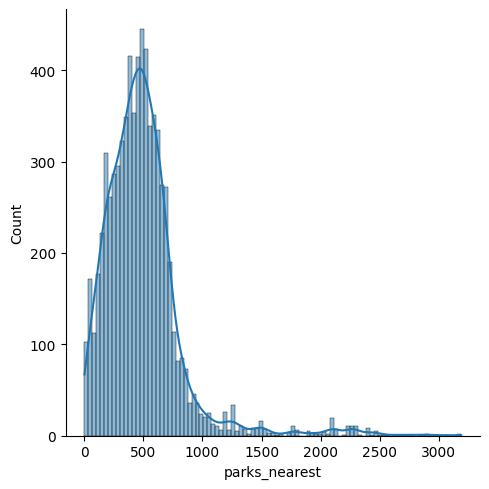

In [110]:
sns.displot(data_flat_v2['parks_nearest'], kde=True);

I think the histogram confirms my theory. Indeed, most of the values are within 1 km. So, we can add a column - "Presence of a park within 1 km" and assign true and false values. In False, we will include both NaN and values greater than 1 km.

In [111]:
def park(variable):
    if variable <= 1000:
        return True
    else:
        return False

data_flat_v2['parks_nearest_1km'] = data_flat_v2['parks_nearest'].apply(park)

In [112]:
display(data_flat_v2.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,airports,cityCenter,parks_nearest_1km
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Very close to the airport,Far from the center,True
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,False,...,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Very close to the airport,Far from the center,False
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Very close to the airport,Average distance to the center,True
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Very close to the airport,Average distance to the center,True
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.65,12.0,14.4,5,NaN,False,...,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,The airport is far away,Not city,False


<font color="red">**21. The distance to the nearest pond (ponds_nearest)** - there is very little data. Currently, there is a presumption that calculations were not made beyond a certain distance, let's say x. So, we can use a boolean value, indicating whether there is a pond nearby or not.</font> 

The case is similar to the one with parks. Let's check the minimum and maximum values and plot a histogram.

In [113]:
print("Maximum distance to the pond", data_flat_v2['ponds_nearest'].max(), "Minimum distance to the pond",data_flat_v2['ponds_nearest'].min())

Maximum distance to the pond 1344.0 Minimum distance to the pond 13.0


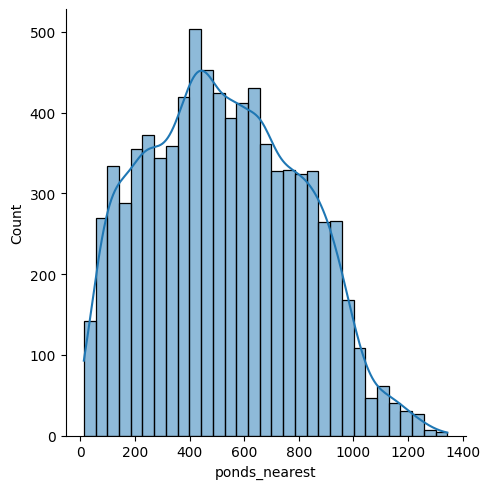

In [114]:
sns.displot(data_flat_v2['ponds_nearest'], kde=True);

Everything looks similar; let's apply a similar solution.

In [115]:
def ponds(variable):
    if variable <= 1000:
        return True
    else:
        return False

data_flat_v2['ponds_nearest_1km'] = data_flat_v2['ponds_nearest'].apply(ponds)

In [116]:
display (data_flat_v2.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,airports,cityCenter,parks_nearest_1km,ponds_nearest_1km
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Very close to the airport,Far from the center,True,True
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,False,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Very close to the airport,Far from the center,False,False
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Very close to the airport,Average distance to the center,True,True
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Very close to the airport,Average distance to the center,True,True
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.65,12.0,14.4,5,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,55.0,The airport is far away,Not city,False,False


<font color="orange">**22. How many days the advertisement was placed (days_exposition)** - Partial data is missing, we need to figure out why.</font> 

I suggest taking a look at the rows where this value is missing for now. We might notice a pattern.

In [118]:
display (data_flat_v2[data_flat_v2['days_exposition'].isna()].head(10)) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,airports,cityCenter,parks_nearest_1km,ponds_nearest_1km
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000,8,NaN,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Very close to the airport,Far from the center,True,True
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24.0,40.096,22,NaN,False,...,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,Very close to the airport,Average distance to the center,False,False
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22.0,22.400,3,NaN,False,...,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,Very close to the airport,Average distance to the center,True,False
45,17,5200000.0,50.6,2018-12-02T00:00:00,2,2.65,9.0,30.300,7,NaN,False,...,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN,Very close to the airport,Average distance to the center,False,False
46,17,6600000.0,52.1,2019-01-31T00:00:00,2,2.60,24.0,29.700,9,NaN,False,...,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN,Very close to the airport,Average distance to the center,False,False
49,1,3050000.0,30.8,2018-11-22T00:00:00,1,2.50,9.0,18.000,7,NaN,False,...,45341.0,16603.0,1.0,675.0,0.0,NaN,NaN,Sufficiently close to the airport,Far from the center,True,False
52,20,11795000.0,136.0,2017-09-22T00:00:00,6,3.00,2.0,94.000,2,NaN,False,...,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN,Very close to the airport,Average distance to the center,True,False
71,20,4850000.0,57.5,2019-03-27T00:00:00,3,2.50,9.0,39.000,8,NaN,False,...,33623.0,12267.0,1.0,334.0,1.0,333.0,NaN,Very close to the airport,Average distance to the center,True,True
81,9,10949000.0,68.0,2018-12-27T00:00:00,1,2.65,10.0,38.080,6,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The airport is far away,Not city,False,False
84,11,2400000.0,43.9,2019-03-13T00:00:00,2,2.65,2.0,27.460,1,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The airport is far away,Not city,False,False


There are no apparent patterns. We can speculate that these listings were still active at the time of data collection. However, the presence of last_price (the price at the time of removal) contradicts this assumption. It's possible that last_price represents the price at the time of removal or at the present moment. For now, I suggest leaving this column unchanged.

<font color="red">**10. This is an apartment (is_apartment)** - there is critically little data. There is a suspicion that the column might have accidentally made its way into the dataset, for instance, it might be necessary if we are looking not only at apartments but also at houses.</font> 

Let's assume that empty values indicate that the apartment is not an apartment, and then we'll replace the values with False.

In [119]:
data_flat_v2['is_apartment'] = data_flat_v2['is_apartment'].fillna(False)

Check the column "is_apartment."

In [120]:
print (data_flat_v2['is_apartment'].tail(10))

23689    False
23690    False
23691    False
23692    False
23693    False
23694    False
23695    False
23696    False
23697    False
23698    False
Name: is_apartment, dtype: bool


Check if there are any remaining rows with the value "True."

In [121]:
data_flat_v2.query('is_apartment == True')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,airports,cityCenter,parks_nearest_1km,ponds_nearest_1km
543,11,12790000.0,56.60,2018-11-06T00:00:00,2,3.50,3.0,29.400000,1,True,False,...,35248.0,30437.0,3.0,53.0,3.0,22.0,NaN,Sufficiently close to the airport,Far from the center,True,True
916,11,8183000.0,70.00,2018-01-11T00:00:00,2,3.12,3.0,40.000000,3,True,False,...,45796.0,21729.0,0.0,NaN,1.0,754.0,179.0,Sufficiently close to the airport,Far from the center,False,True
1608,12,2150000.0,20.10,2019-01-30T00:00:00,1,2.65,9.0,11.256000,1,True,False,...,26646.0,12147.0,0.0,NaN,0.0,NaN,13.0,Very close to the airport,Average distance to the center,False,False
2975,9,4931398.0,42.90,2018-07-23T00:00:00,1,3.15,4.0,20.390000,3,True,False,...,44870.0,20802.0,0.0,NaN,1.0,792.0,273.0,Sufficiently close to the airport,Far from the center,False,True
3067,13,6600000.0,95.00,2018-09-08T00:00:00,2,4.50,7.0,45.000000,7,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,96.0,The airport is far away,Not city,False,False
3816,4,4779000.0,53.10,2016-05-16T00:00:00,1,2.65,13.0,19.800000,6,True,False,...,19396.0,4516.0,0.0,NaN,1.0,826.0,60.0,Very close to the airport,Close to the center,False,True
3951,10,4300000.0,50.00,2019-04-20T00:00:00,1,3.00,11.0,17.000000,9,True,False,...,10143.0,11367.0,0.0,NaN,0.0,NaN,NaN,Very close to the airport,Average distance to the center,False,False
5076,0,3850000.0,30.50,2018-10-03T00:00:00,1,2.40,5.0,19.500000,1,True,False,...,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0,Very close to the airport,Average distance to the center,True,True
5654,20,9200000.0,116.00,2019-04-26T00:00:00,3,3.20,5.0,68.000000,5,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The airport is far away,Not city,False,False
5809,10,7900000.0,74.00,2019-02-12T00:00:00,3,3.55,6.0,56.000000,3,True,False,...,31006.0,3075.0,2.0,123.0,3.0,274.0,6.0,Very close to the airport,Close to the center,True,True


**Check what percentage of data we have removed.**

In [122]:
a*100/23699

7.211274737330689

**Now let's take another look at the columns and think about where we need to change the data types.**

In [123]:
data_flat_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21990 entries, 0 to 23698
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21990 non-null  int64  
 1   last_price            21990 non-null  float64
 2   total_area            21990 non-null  float64
 3   first_day_exposition  21990 non-null  object 
 4   rooms                 21990 non-null  int64  
 5   ceiling_height        21990 non-null  float64
 6   floors_total          21911 non-null  float64
 7   living_area           21990 non-null  float64
 8   floor                 21990 non-null  int64  
 9   is_apartment          21990 non-null  bool   
 10  studio                21990 non-null  bool   
 11  open_plan             21990 non-null  bool   
 12  kitchen_area          21990 non-null  float64
 13  balcony               11377 non-null  float64
 14  locality_name         21990 non-null  object 
 15  airports_nearest   

I see that the data type needs to be changed for the 'first_day_exposition' column, to be replaced with the date type. Let's work with 'first_day_exposition

In [124]:
data_flat_v2['first_day_exposition']= pd.to_datetime(data_flat_v2['first_day_exposition']) #Convert the column to the date format
import datetime as dt
data_flat_v2['first_day_exposition'] = data_flat_v2['first_day_exposition'].dt.date #Remove the time from the date

In [125]:
display (data_flat_v2.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,airports,cityCenter,parks_nearest_1km,ponds_nearest_1km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Very close to the airport,Far from the center,True,True
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Very close to the airport,Far from the center,False,False
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Very close to the airport,Average distance to the center,True,True
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Very close to the airport,Average distance to the center,True,True
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,55.0,The airport is far away,Not city,False,False


**At this point, the data cleaning is completed.** Additional aspects that may require further processing could be identified during further work with the data.

### Add new columns to the table.

**Calculating the price per square meter (divide the property cost by its total area, and then round to two decimal places).**

In [126]:
data_flat_v2['cost_1_sq_m'] = (data_flat_v2['last_price']/data_flat_v2['total_area']).round(2)

In [127]:
print (data_flat_v2.head()) #Checking the result

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
4             2  10000000.0       100.0           2018-06-19      2   
5            10   2890000.0        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
0            2.70          16.0         51.0      8         False   False   
1            2.65          11.0         18.6      1         False   False   
2            2.65           5.0         34.3      4         False   False   
4            3.03          14.0         32.0     13         False   False   
5            2.65          12.0         14.4      5         False   False   

   ...  cityCenters_nearest  parks_around3000  parks_nearest ponds_around3000  \
0  ...              16028.0  

**Determining the publication day as a number. (0 - Monday, 1 - Tuesday, and so on)**

In [128]:
data_flat_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21990 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21990 non-null  int64  
 1   last_price            21990 non-null  float64
 2   total_area            21990 non-null  float64
 3   first_day_exposition  21990 non-null  object 
 4   rooms                 21990 non-null  int64  
 5   ceiling_height        21990 non-null  float64
 6   floors_total          21911 non-null  float64
 7   living_area           21990 non-null  float64
 8   floor                 21990 non-null  int64  
 9   is_apartment          21990 non-null  bool   
 10  studio                21990 non-null  bool   
 11  open_plan             21990 non-null  bool   
 12  kitchen_area          21990 non-null  float64
 13  balcony               11377 non-null  float64
 14  locality_name         21990 non-null  object 
 15  airports_nearest   

In [129]:
data_flat_v2['first_day_exposition']= pd.to_datetime(data_flat_v2['first_day_exposition'])
data_flat_v2['day_of_week_exposition'] = data_flat_v2['first_day_exposition'].dt.weekday

In [130]:
display (data_flat_v2.head()) #Checking the result

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,airports,cityCenter,parks_nearest_1km,ponds_nearest_1km,cost_1_sq_m,day_of_week_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,...,1.0,482.0,2.0,755.0,NaN,Very close to the airport,Far from the center,True,True,120370.37,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,...,0.0,NaN,0.0,NaN,81.0,Very close to the airport,Far from the center,False,False,82920.79,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,...,1.0,90.0,2.0,574.0,558.0,Very close to the airport,Average distance to the center,True,True,92785.71,3
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,...,2.0,112.0,1.0,48.0,121.0,Very close to the airport,Average distance to the center,True,True,100000.00,1
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,False,...,NaN,NaN,NaN,NaN,55.0,The airport is far away,Not city,False,False,95065.79,0


**Highlighting the month of the ad publication**

In [131]:
data_flat_v2['month_of_publication'] = data_flat_v2['first_day_exposition'].dt.month 

In [132]:
display (data_flat_v2.head()) #Checking the result

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,airports,cityCenter,parks_nearest_1km,ponds_nearest_1km,cost_1_sq_m,day_of_week_exposition,month_of_publication
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,...,482.0,2.0,755.0,NaN,Very close to the airport,Far from the center,True,True,120370.37,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,...,NaN,0.0,NaN,81.0,Very close to the airport,Far from the center,False,False,82920.79,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,...,90.0,2.0,574.0,558.0,Very close to the airport,Average distance to the center,True,True,92785.71,3,8
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,...,112.0,1.0,48.0,121.0,Very close to the airport,Average distance to the center,True,True,100000.00,1,6
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,False,...,NaN,NaN,NaN,55.0,The airport is far away,Not city,False,False,95065.79,0,9


**Highlighting the year of the ad publication**

In [133]:
data_flat_v2['year_of_publication'] = data_flat_v2['first_day_exposition'].dt.year

In [134]:
display (data_flat_v2.head()) #Checking the result

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,airports,cityCenter,parks_nearest_1km,ponds_nearest_1km,cost_1_sq_m,day_of_week_exposition,month_of_publication,year_of_publication
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,...,2.0,755.0,NaN,Very close to the airport,Far from the center,True,True,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,...,0.0,NaN,81.0,Very close to the airport,Far from the center,False,False,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,...,2.0,574.0,558.0,Very close to the airport,Average distance to the center,True,True,92785.71,3,8,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,...,1.0,48.0,121.0,Very close to the airport,Average distance to the center,True,True,100000.00,1,6,2018
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,False,...,NaN,NaN,55.0,The airport is far away,Not city,False,False,95065.79,0,9,2018


**Determine the type of floor in the apartment (values: "first," "last," "other")**

In [135]:
def floor(row):
    if row['floor'] == 1:
        return "first"
    elif row['floor'] == row['floors_total']:
        return 'last'
    else:
        return 'other'
    
data_flat_v2['floor_type']= data_flat_v2.apply(floor, axis=1)

In [136]:
display (data_flat_v2.head()) #Checking the result

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_nearest,days_exposition,airports,cityCenter,parks_nearest_1km,ponds_nearest_1km,cost_1_sq_m,day_of_week_exposition,month_of_publication,year_of_publication,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,...,755.0,NaN,Very close to the airport,Far from the center,True,True,120370.37,3,3,2019,other
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,...,NaN,81.0,Very close to the airport,Far from the center,False,False,82920.79,1,12,2018,first
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,...,574.0,558.0,Very close to the airport,Average distance to the center,True,True,92785.71,3,8,2015,other
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,...,48.0,121.0,Very close to the airport,Average distance to the center,True,True,100000.00,1,6,2018,other
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,False,...,NaN,55.0,The airport is far away,Not city,False,False,95065.79,0,9,2018,other


**Distance to the city center in kilometers (convert from meters to kilometers and round)**

In [137]:
data_flat_v2['cityCenters_nearest_in_km'] = (data_flat_v2['cityCenters_nearest'] /1000).round()

In [138]:
display (data_flat_v2.head()) #Checking the result

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,days_exposition,airports,cityCenter,parks_nearest_1km,ponds_nearest_1km,cost_1_sq_m,day_of_week_exposition,month_of_publication,year_of_publication,floor_type,cityCenters_nearest_in_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,...,NaN,Very close to the airport,Far from the center,True,True,120370.37,3,3,2019,other,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,...,81.0,Very close to the airport,Far from the center,False,False,82920.79,1,12,2018,first,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,False,...,558.0,Very close to the airport,Average distance to the center,True,True,92785.71,3,8,2015,other,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,False,...,121.0,Very close to the airport,Average distance to the center,True,True,100000.00,1,6,2018,other,8.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,False,False,...,55.0,The airport is far away,Not city,False,False,95065.79,0,9,2018,other,NaN


**All necessary columns have been added**

### Data Analysis

<font color="#FF1493">**Next, let's create histograms for the parameters:**</font>  

**Total area**

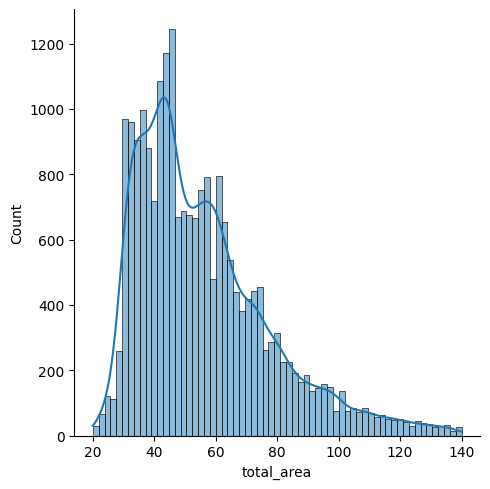

In [139]:
sns.displot(data_flat_v2['total_area'], kde=True);

There is a small tail on the right, but we have already partially removed it and left the size of apartments up to 140 sq. m.

**Living area**

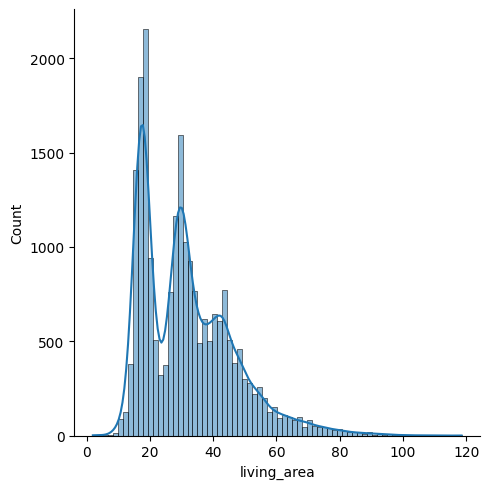

In [140]:
sns.displot(data_flat_v2['living_area'], kde=True);

The graph of the living area also has a small tail, but we will not remove it, as we have already made reductions based on the total area.

**Kitchen area**

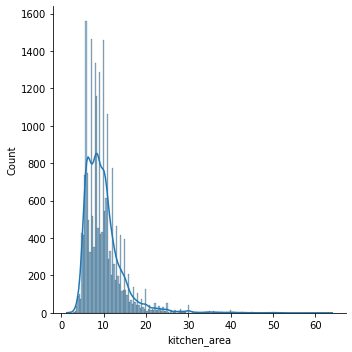

In [666]:
sns.displot(data_flat_v2['kitchen_area'], kde=True);

From the graph, it is evident that there are very few kitchens larger than 30 sq.m. I believe we can disregard this tail and remove it. However, it's important to keep in mind that it's generally better not to delete more than 10% of the data, and we have already removed around 7%."

In [141]:
print ((data_flat_v2.query('kitchen_area >30'))['kitchen_area'].count())

151


151 may not seem like a lot. Let's take a look at kitchens larger than 40 sq.m.

In [142]:
print ((data_flat_v2.query('kitchen_area >40'))['kitchen_area'].count())

48


The value is three times smaller. I suggest removing these specific values. Let's not forget to count the total number of deleted records and the percentage of deleted data.

In [143]:
a = a+(data_flat_v2.query('kitchen_area >40'))['kitchen_area'].count()

In [144]:
a

1757

In [145]:
data_flat_v2 = data_flat_v2.query('not kitchen_area >40')

In [146]:
data_flat_v2.info()#Check if we accidentally deleted too many values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21942 entries, 0 to 23698
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               21942 non-null  int64         
 1   last_price                 21942 non-null  float64       
 2   total_area                 21942 non-null  float64       
 3   first_day_exposition       21942 non-null  datetime64[ns]
 4   rooms                      21942 non-null  int64         
 5   ceiling_height             21942 non-null  float64       
 6   floors_total               21863 non-null  float64       
 7   living_area                21942 non-null  float64       
 8   floor                      21942 non-null  int64         
 9   is_apartment               21942 non-null  bool          
 10  studio                     21942 non-null  bool          
 11  open_plan                  21942 non-null  bool          
 12  kitc

Let's take another look at the histogram.

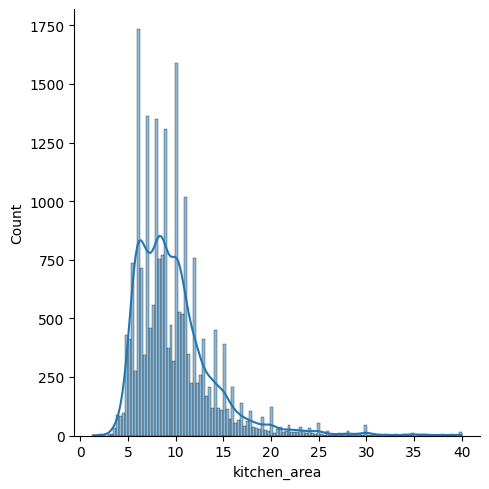

In [147]:
sns.displot(data_flat_v2['kitchen_area'], kde=True);

Let's calculate the percentage of deleted data.

In [148]:
a*100/23699

7.413814928899954

**Last price**

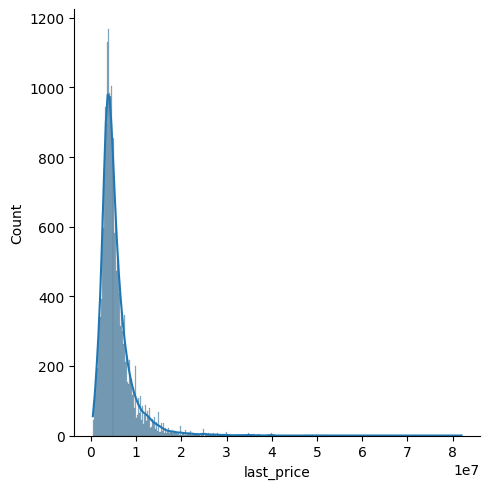

In [149]:
sns.displot(data_flat_v2['last_price'], kde=True);

I've already worked with the price, but the tail is still large. Most likely, during the first deletion, I chose the wrong value. It seems that I need to keep apartments with a price to 30,000,000. First, let's see how many rows have this condition.

In [150]:
print ((data_flat_v2.query('last_price > 30000000'))['last_price'].count())

64


64 rows is a small number, let's delete them, saving the count in the variable 'a'

In [151]:
a = a+(data_flat_v2.query('last_price > 30000000'))['last_price'].count()

In [152]:
a

1821

In [155]:
data_flat_v2 = data_flat_v2.query('not last_price > 30000000') 

In [156]:
data_flat_v2.info()#Check if we accidentally deleted too many values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21878 entries, 0 to 23698
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               21878 non-null  int64         
 1   last_price                 21878 non-null  float64       
 2   total_area                 21878 non-null  float64       
 3   first_day_exposition       21878 non-null  datetime64[ns]
 4   rooms                      21878 non-null  int64         
 5   ceiling_height             21878 non-null  float64       
 6   floors_total               21799 non-null  float64       
 7   living_area                21878 non-null  float64       
 8   floor                      21878 non-null  int64         
 9   is_apartment               21878 non-null  bool          
 10  studio                     21878 non-null  bool          
 11  open_plan                  21878 non-null  bool          
 12  kitc

Let's build the histogram again.

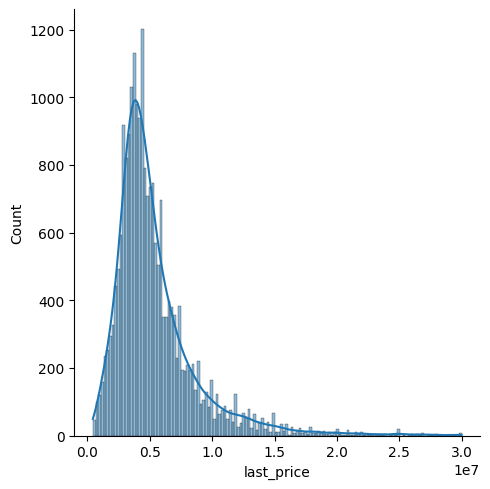

In [157]:
sns.displot(data_flat_v2['last_price'], kde=True);

Let's calculate the percentage of deleted data.

In [158]:
a*100/23699

7.683868517658973

Not reached 10% yet:)

**Rooms**

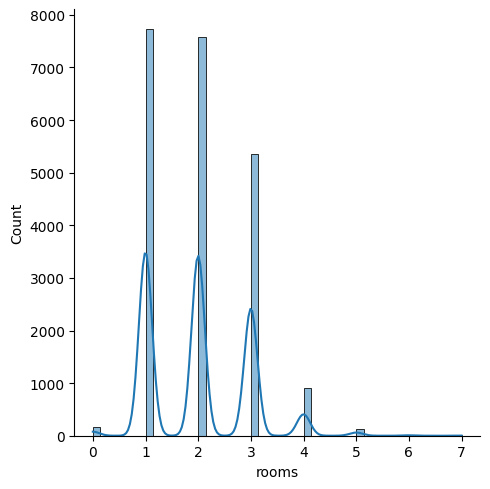

In [159]:
sns.displot(data_flat_v2['rooms'], kde=True);

I suggest not filtering by the number of apartments for now.

**Сeiling height**

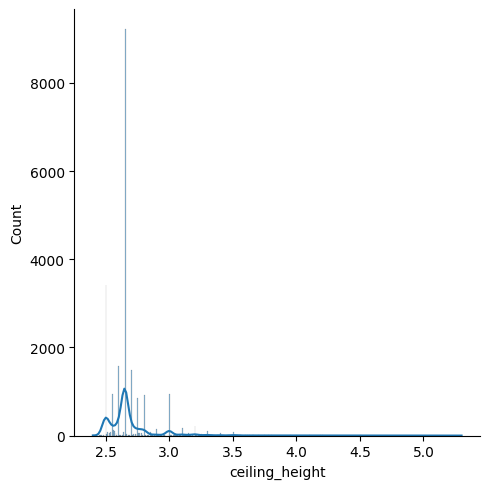

In [160]:
sns.displot(data_flat_v2['ceiling_height'], kde=True);

At the first processing, I left ceilings higher than 7m. If we look at the tail, we can stop around 3.3. Let's see how many apartments fall into this range.

In [161]:
print ((data_flat_v2.query('ceiling_height > 3.3'))['ceiling_height'].count())

371


Checking 3.5

In [163]:
print ((data_flat_v2.query('ceiling_height > 3.5'))['ceiling_height'].count())

170


Let's remove all apartments with ceilings higher than 3.5, but first, let's calculate the total number of deleted records.

In [164]:
a = a+(data_flat_v2.query('ceiling_height > 3.5'))['ceiling_height'].count()

In [165]:
a

1991

In [166]:
data_flat_v2 = data_flat_v2.query('not ceiling_height > 3.5')

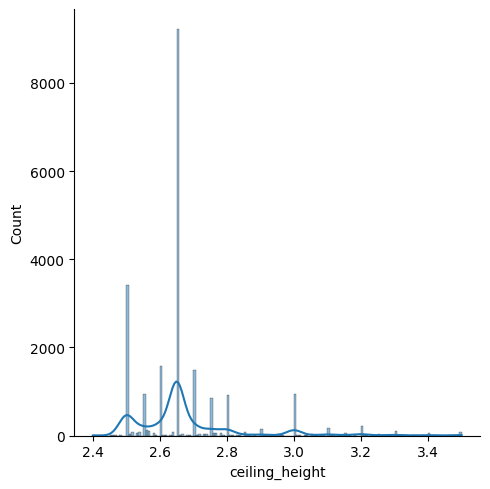

In [167]:
sns.displot(data_flat_v2['ceiling_height'], kde=True);

**Floor type of the apartment ('first', 'last', 'other')**

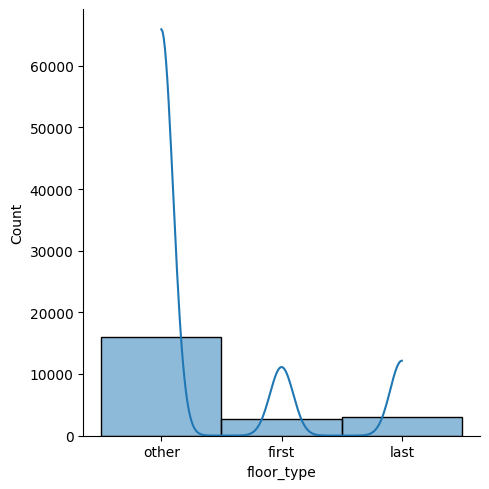

In [168]:
sns.displot(data_flat_v2['floor_type'], kde=True);

You can see that the proportion of apartments on the first and last floor is approximately equal

**Floors total**

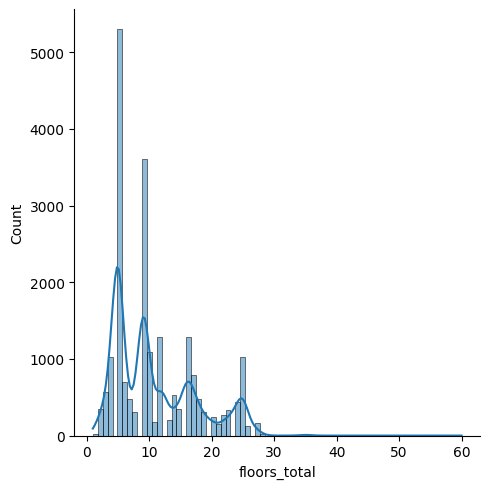

In [169]:
sns.displot(data_flat_v2['floors_total'], kde=True);

We can see that most apartments are located between the first and 30th floors. However, the 60th floor seems realistic to me, I won't delete the data for now.

**Distance to the city center in meters**

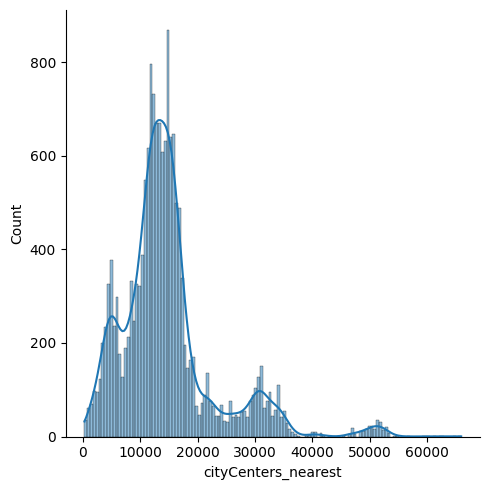

In [170]:
sns.displot(data_flat_v2['cityCenters_nearest'], kde=True);

The most common distance value is 10 km. We already worked with distances during data cleaning and created a classification based on distance:

- from 208 to 3000 meters - very close to the center
- from 3001 to 6000 meters - close to the center
- from 6000 to 15000 meters - average distance to the center
- from 15000 to 65952 meters - far from the center
- NaN - Not in the city

**Calculate the percentage of deleted data**

In [172]:
a*100/23699

8.401198362800118

"Hooray!!! We haven't exceeded 10%"

<font color="#FF1493">Let's study how quickly apartments were sold (the days_exposition column):

- Build a histogram.
- Calculate the mean and median.
- Answer the question of how much time, on average, it takes for an apartment to be sold. What sales can be considered fast, and which ones are unusually long?</font>  

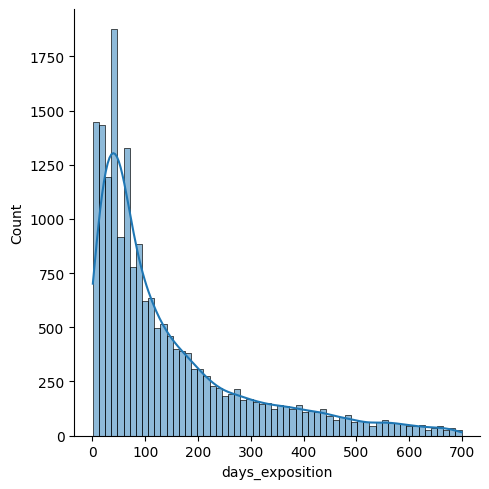

In [173]:
sns.displot(data_flat_v2['days_exposition'], kde=True);

In [174]:
data_flat_v2['days_exposition'].describe()

count    18802.000000
mean       145.673173
std        149.381500
min          1.000000
25%         43.000000
50%         89.000000
75%        200.000000
max        699.000000
Name: days_exposition, dtype: float64

Earlier, during data preprocessing, we already did some work and removed part of the tail in the days of sale. We removed 803 values, apartments that were on the market for more than 700 days. Perhaps this was 'abrupt.' The median time of sale turned out to be 89 days. It seems to me that everything up to the 25th percentile can be considered fast sales, that is, up to 43 days. After the 75th percentile, they can be considered long, that is, from 199 days.

<font color="#FF1493">**Let's build graphs showing the dependence of the price on other factors.**</font>

**Dependence on the total area**

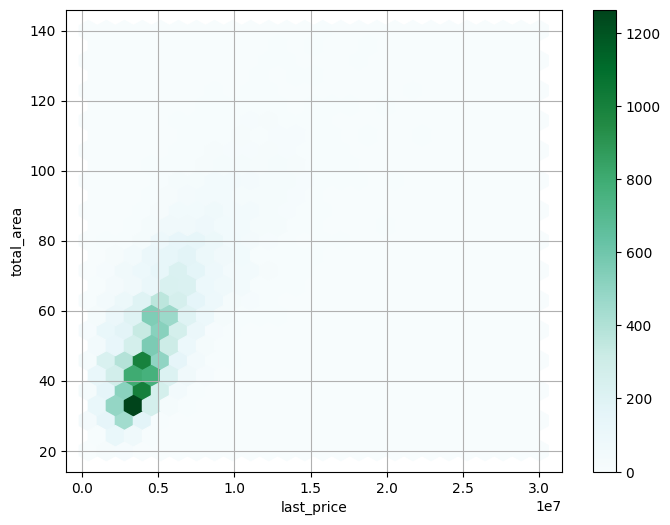

In [175]:
data_flat_v2.plot(x='last_price', y='total_area', kind='hexbin', gridsize=25, figsize=(8, 6), sharex=False, grid=True);

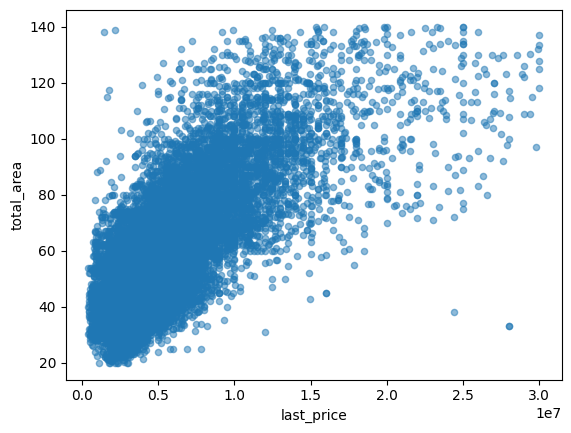

In [176]:
data_flat_v2.plot(x='last_price', y='total_area', kind='scatter', alpha = 0.5);

In [177]:
print(data_flat_v2['last_price'].corr(data_flat_v2['total_area']))

0.7438877299754025


<font color="#008080">Both from the plots and the correlation function, it can be clearly seen that the price depends on the total area. The correlation coefficient is quite high at 0.74.</font>

**Dependence on the living area**

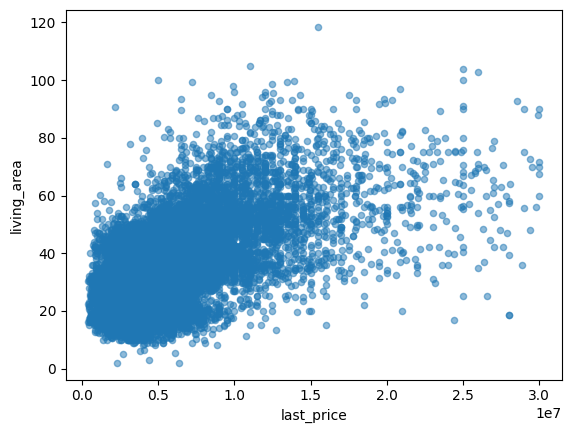

In [178]:
data_flat_v2.plot(x='last_price', y='living_area', kind='scatter', alpha = 0.5);

In [179]:
print(data_flat_v2['last_price'].corr(data_flat_v2['living_area']))

0.6236528890901518


<font color="#008080">Here, the dependence is slightly weaker, but it still appears to be at a fairly high level, with a correlation coefficient of 0.62.</font>

**Dependence on kitchen area**

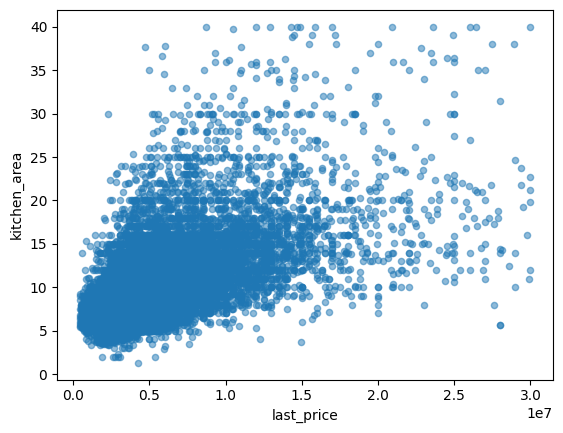

In [180]:
data_flat_v2.plot(x='last_price', y='kitchen_area', kind='scatter', alpha = 0.5);

In [181]:
print(data_flat_v2['last_price'].corr(data_flat_v2['kitchen_area']))

0.5869411941760935


<font color="#008080">Dependence is maintained, but a larger total area has a greater impact on the price than the kitchen area.</font>

**Dependence on the number of rooms**

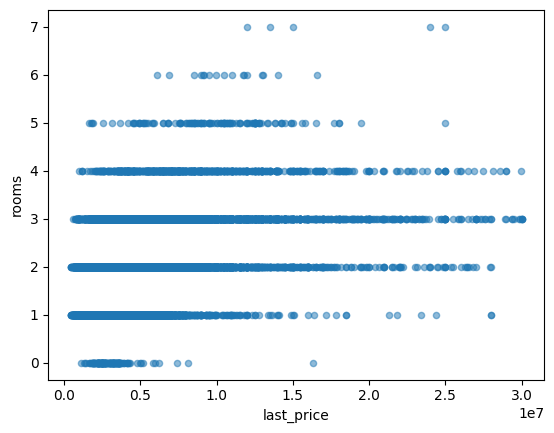

In [182]:
data_flat_v2.plot(x='last_price', y='rooms', kind='scatter', alpha = 0.5);

In [183]:
print(data_flat_v2['last_price'].corr(data_flat_v2['rooms']))

0.44603046127343743


<font color="#008080">Dependence on the number of rooms is also present. I think this is due to the fact that the more rooms, the larger the area. What seems interesting is that 5, 6, and 7-room apartments, judging by the graph, sometimes cost less than 3, 2-room apartments. I think this may be due to the significant influence of St. Petersburg. For example, large apartments are located outside the city and therefore are cheaper. Just in case, let's look at the data, literally at 6 and 7-room apartments, where they are located.</font>

In [184]:
pd.set_option('display.max_columns', None)
data_flat_v2.loc[data_flat_v2['rooms'] >=6]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,airports,cityCenter,parks_nearest_1km,ponds_nearest_1km,cost_1_sq_m,day_of_week_exposition,month_of_publication,year_of_publication,floor_type,cityCenters_nearest_in_km
52,20,11795000.0,136.0,2017-09-22,6,3.00,2.0,94.000,2,False,False,False,11.000,1.0,Санкт-Петербург,16510.0,6582.0,1.0,526.0,0.0,NaN,NaN,Very close to the airport,Average distance to the center,True,False,86727.94,4,9,2017,last,7.0
855,18,15000000.0,134.0,2017-10-27,7,2.65,4.0,88.000,3,False,False,False,12.000,NaN,Санкт-Петербург,22670.0,3936.0,1.0,803.0,1.0,387.0,150.0,Very close to the airport,Close to the center,True,True,111940.30,4,10,2017,other,4.0
2017,1,9100000.0,111.0,2017-07-04,6,2.75,3.0,84.500,3,False,False,False,10.200,0.0,Санкт-Петербург,21984.0,1902.0,2.0,588.0,1.0,54.0,61.0,Very close to the airport,Very close to the center,True,True,81981.98,1,7,2017,last,2.0
3314,20,16550000.0,96.0,2018-02-16,6,2.60,5.0,80.000,3,False,False,False,10.000,NaN,Санкт-Петербург,22223.0,700.0,3.0,546.0,3.0,183.0,108.0,Very close to the airport,Very close to the center,True,True,172395.83,4,2,2018,other,1.0
3324,1,9200000.0,138.0,2016-03-22,6,2.65,5.0,77.600,2,False,False,False,14.100,NaN,Санкт-Петербург,22488.0,4840.0,1.0,311.0,0.0,NaN,672.0,Very close to the airport,Close to the center,True,False,66666.67,1,3,2016,other,5.0
5255,15,6100000.0,87.0,2017-06-28,6,3.50,3.0,68.000,2,False,False,False,5.900,NaN,Пушкин,19397.0,34251.0,1.0,534.0,3.0,676.0,NaN,Very close to the airport,Far from the center,True,True,70114.94,2,6,2017,other,34.0
9856,13,12000000.0,106.0,2018-07-30,6,2.80,3.0,70.000,1,False,False,False,15.000,NaN,Санкт-Петербург,20290.0,4733.0,0.0,NaN,1.0,238.0,NaN,Very close to the airport,Close to the center,False,True,113207.55,0,7,2018,first,5.0
10177,9,13030000.0,130.3,2017-10-20,6,2.65,5.0,93.000,2,False,False,False,10.300,NaN,Санкт-Петербург,17815.0,7121.0,1.0,429.0,0.0,NaN,NaN,Very close to the airport,Average distance to the center,True,False,100000.00,4,10,2017,other,7.0
11409,20,9990000.0,120.0,2016-03-15,6,2.65,16.0,96.000,3,False,False,False,18.000,0.0,Санкт-Петербург,33254.0,14353.0,0.0,NaN,0.0,NaN,323.0,Very close to the airport,Average distance to the center,False,False,83250.00,1,3,2016,other,14.0
14264,13,14000000.0,94.0,2019-01-23,6,2.65,NaN,51.000,23,False,False,False,16.300,NaN,Санкт-Петербург,51333.0,13056.0,0.0,NaN,0.0,NaN,NaN,Sufficiently close to the airport,Average distance to the center,False,False,148936.17,2,1,2019,other,13.0


My theory did not work out; on the contrary, all large apartments are in St. Petersburg. The only thing that can be noticed is that often there is no park or pond near these apartments. Additionally, knowing that we truncated the area, I can assume that conditional three-room apartments can sometimes be larger. Since the total area is valued more (we found out that there is a very stable correlation), for this reason, they can sometimes be cheaper than the most expensive three-room apartments.

**Dependency on the floor**

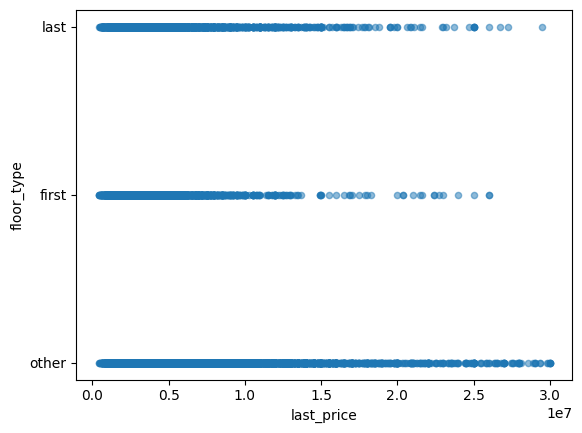

In [185]:
data_flat_v2.plot(x='last_price', y='floor_type', kind='scatter', alpha = 0.5);

<font color="#008080">It can be seen that apartments on the first floor are the cheapest, on the last floor they have a higher price, but the most expensive ones can be found on intermediate floors.</font>

**Dependency on the week of placement**

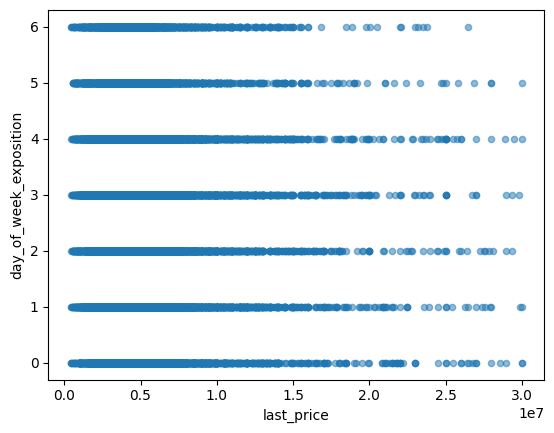

In [186]:
data_flat_v2.plot(x='last_price', y='day_of_week_exposition', kind='scatter', alpha = 0.5);

<font color="#008080">There is no dependence on the day of the week of posting the ad</font>

**Dependence on the month of placement**

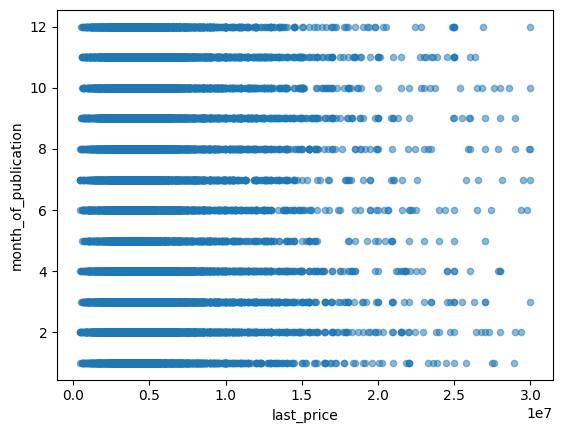

In [187]:
data_flat_v2.plot(x='last_price', y='month_of_publication', kind='scatter', alpha = 0.5);

<font color="#008080">There is no dependence on the month of listing</font>

**Dependency on the year of listing is not observed**

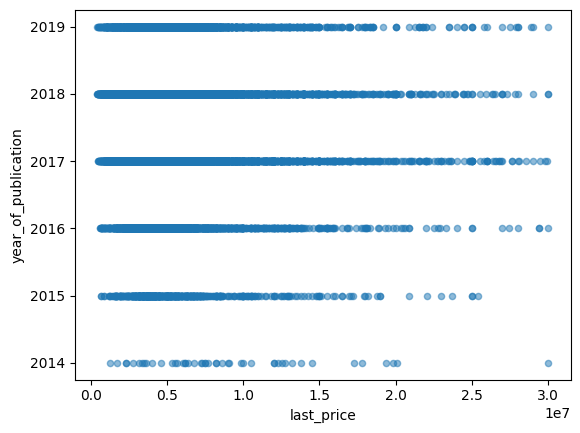

In [188]:
data_flat_v2.plot(x='last_price', y='year_of_publication', kind='scatter', alpha = 0.5);

<font color="#008080">The correlation analysis showed no correlation, but we can see that in 2014 there were no prices above 20,000,000 at all, and this number gradually increases, with a slight decrease in 2019.</font>

<font color="#FF1493">**Let's calculate the average price per square meter in the top 10 settlements with the highest number of ads** (we will create a pivot table with the count of ads and the average price per square meter for these settlements)</font>


In [189]:
average_price = data_flat_v2.pivot_table(index = 'locality_name', values='cost_1_sq_m',aggfunc=['mean', 'count']).reset_index()


In [190]:
print (average_price.head())

     locality_name          mean       count
                     cost_1_sq_m cost_1_sq_m
0        Агалатово  71214.470000           4
1  Александровская  63559.320000           1
2       Алексеевка  22222.220000           1
3           Аннино  63782.769286          14
4              Аро  51412.420000           3


In [191]:
average_price.columns = ['locality_name ', 'mean_cost_1_sq_m', 'total_adds']

In [192]:
print (average_price.head())

    locality_name   mean_cost_1_sq_m  total_adds
0        Агалатово      71214.470000           4
1  Александровская      63559.320000           1
2       Алексеевка      22222.220000           1
3           Аннино      63782.769286          14
4              Аро      51412.420000           3


In [716]:
print(average_price.sort_values(by='total_adds', ascending = False).head(10))

      locality_name   mean_cost_1_sq_m  total_adds
222  Санкт-Петербург     109911.734780       14162
145           Мурино      86042.174082         561
105          Кудрово      95577.929376         449
294           Шушары      78669.071368         424
34        Всеволожск      68699.223697         376
201           Пушкин     102314.521395         337
88           Колпино      75319.526970         330
169        Парголово      90176.812484         318
42           Гатчина      68851.728662         284
35            Выборг      58363.835115         217


<font color="#008080">In the top both in terms of the number of ads and prices, as expected, is St. Petersburg. Here, the highest price is 109,073 per square meter, and the lowest is 58,266 in Vyborg</font>

<font color="#FF1493">**Let's highlight the localities with the highest and lowest cost per square meter.**</font>


In [193]:
maxim = average_price['mean_cost_1_sq_m'].max()

In [194]:
maxim

117810.5856521739

In [195]:
average_price.query('mean_cost_1_sq_m == 117810.5856521739')

,locality_name,mean_cost_1_sq_m,total_adds
64,Зеленогорск,117810.585652,23


In [196]:
minim = average_price['mean_cost_1_sq_m'].min()

In [197]:
minim

11206.220000000001

In [198]:
average_price.query('mean_cost_1_sq_m == 11206.220000000001') 

,locality_name,mean_cost_1_sq_m,total_adds
249,Старополье,11206.22,3


<font color="#FF1493">**Let's highlight the apartments in St. Petersburg using the locality_name column and calculate their average cost at different distances from the center. We will plot a graph of the average price changes for each kilometer from the center of St. Petersburg.**</font>

In [200]:
flat_sbp = data_flat_v2.query('locality_name == "Санкт-Петербург"')

Now, based on the new table, let's create a pivot_table with grouping by the distance from the center.

In [201]:
sbp_group_by_center = flat_sbp.pivot_table(index = 'cityCenters_nearest_in_km', values='last_price').reset_index()


In [202]:
print (sbp_group_by_center.head())

   cityCenters_nearest_in_km    last_price
0                        0.0  8.898750e+06
1                        1.0  1.098891e+07
2                        2.0  9.946238e+06
3                        3.0  8.766258e+06
4                        4.0  9.302967e+06


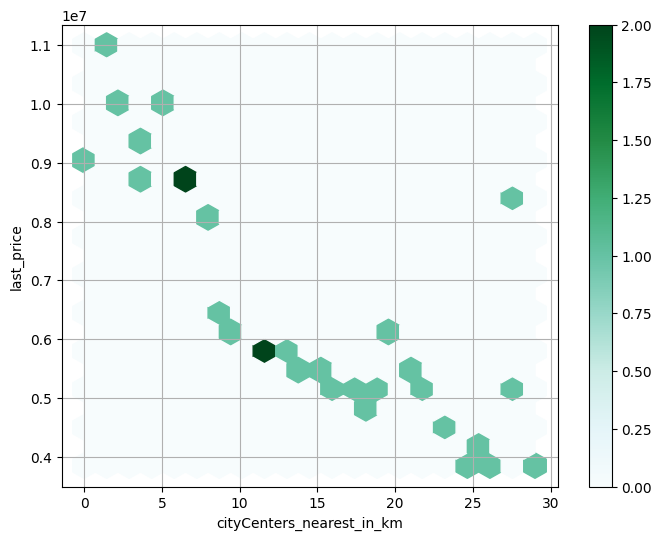

In [203]:
sbp_group_by_center.plot(x='cityCenters_nearest_in_km', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True);

In [204]:
print(sbp_group_by_center['cityCenters_nearest_in_km'].corr(sbp_group_by_center['last_price']))

-0.8172396706204438


<font color="#008080">Both the graph and the correlation coefficient clearly show a dependency: the closer to the center, the higher the price.</font>

<font color="#FF1493">**In addition to the work done, I would like to explore how the proximity to lakes, parks, and airports affects the price.**</font>

At the beginning, let's take another look at the data we have:

In [205]:
data_flat_v2

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,airports,cityCenter,parks_nearest_1km,ponds_nearest_1km,cost_1_sq_m,day_of_week_exposition,month_of_publication,year_of_publication,floor_type,cityCenters_nearest_in_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,25.000,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Very close to the airport,Far from the center,True,True,120370.37,3,3,2019,other,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.000,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Very close to the airport,Far from the center,False,False,82920.79,1,12,2018,first,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.300,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Very close to the airport,Average distance to the center,True,True,92785.71,3,8,2015,other,14.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,False,False,9.100,NaN,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,The airport is far away,Not city,False,False,95065.79,0,9,2018,other,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,False,False,14.400,1.0,Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,Sufficiently close to the airport,Far from the center,False,False,99195.71,3,11,2017,other,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.00,8,False,False,False,8.000,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,Sufficiently close to the airport,Far from the center,True,True,73717.95,4,8,2016,other,34.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.00,4,False,False,False,8.500,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,The airport is far away,Not city,False,False,52542.37,0,1,2018,other,NaN
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.70,1,False,False,False,9.639,NaN,Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The airport is far away,Not city,False,False,44091.71,6,2,2018,first,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,42.98,12,False,False,False,23.300,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,Sufficiently close to the airport,Average distance to the center,True,True,149511.40,1,3,2017,other,10.0


And the first thing we'll check is how the proximity to the airport affects the price. We'll perform some simple calculations and examine the average cost per square meter for different distances from the airport.

In [206]:
airport_depend = data_flat_v2.pivot_table(index = 'airports', values='cost_1_sq_m').reset_index()

In [207]:
airport_depend

,airports,cost_1_sq_m
0,Average distance to the airport,87502.123670
1,Sufficiently close to the airport,104755.112153
2,The airport is far away,62307.241199
3,Very close to the airport,107137.883163


<font color="#008080">We can see that the proximity to the airport affects the price, most likely because the categories "airport quite close" and "very close" are related to large populated areas, the city of St. Petersburg itself, or its nearest cities, where real estate prices tend to be higher.</font>

Let's take another look to see if having a park or lake nearby has any impact on the price.

In [208]:
park_depend = data_flat_v2.pivot_table(index = ['parks_nearest_1km'], values='cost_1_sq_m').reset_index()

In [209]:
park_depend

,parks_nearest_1km,cost_1_sq_m
0,False,88593.211712
1,True,111162.400890


In [210]:
ponds_depend = data_flat_v2.pivot_table(index = ['ponds_nearest_1km'], values='cost_1_sq_m').reset_index()

In [324]:
ponds_depend

,ponds_nearest_1km,cost_1_sq_m
0,False,87739.000939
1,True,108251.129242


<font color="#008080">If we look at it in a very generalized way, we can conclude that the presence of parks and lakes affects the housing prices.</font>

### Summary:

Our goal was to understand the factors influencing the housing prices, specifically apartments in St. Petersburg and its surroundings. We had a considerable amount of data, partly filled in by customers and partly added automatically.

The first step was data cleaning. We identified outliers in housing prices (around 10%), total area (around 5%), and days an ad was placed (around 5%). Most outliers were on the right side of the histograms. In total, we removed just over 8% of the data.

After removing some data, we proceeded to fill in missing values. Ceiling height outliers were removed, and extreme values were divided by 10. Empty values were filled with the median. Regarding the number of floors, missing values were left as is since the median was not suitable.

For the area, we removed rows where the total area was less than the sum of the living and kitchen areas. Empty values were replaced with the median share of the total area.

For the number of balconies, we left NaN values as 0.

City and settlement names were cleaned by removing prefixes like 'urban-type settlement' to reduce duplicates.

Then we moved on to calculated data. We partially filled some machine-generated data, such as data on the number of nearby lakes and parks. We also categorized automated data for simpler analysis.

After removing some rows with outliers and filling missing data, we added new data to the table: price per square meter, extracted years, months, and weeks of property purchase, and calculated the distance to the city center in kilometers.

Next, we revisited the data for outliers. At this stage, we removed rows with kitchens larger than 40 sq.m, apartments priced above 30,000,000, and ceiling heights above 3.5.

We then analyzed how quickly apartments were sold and concluded that the average time for a sale is 89 days, with fast sales occurring in up to 43 days and slow sales taking more than 199 days.

We further analyzed the dependence of apartment prices on other factors and found:

A direct correlation with total area, where larger apartments are generally more expensive.
The living area size has a greater impact on price than the kitchen area.
The total area has a stronger influence than the number of rooms.
Apartments on the first floor are generally cheaper than those on higher or intermediate floors.
There is no significant dependence on the week and month of placement, but there is a small dependence on the year.
We then discovered that St. Petersburg is not the most expensive city per square meter, likely due to having a large amount of data that had a smoothing effect. Analyzing St. Petersburg separately, we confirmed that proximity to the city center significantly influences prices.

Additionally, we found that proximity to an airport and the presence of parks and lakes nearby also add to the apartment's value.